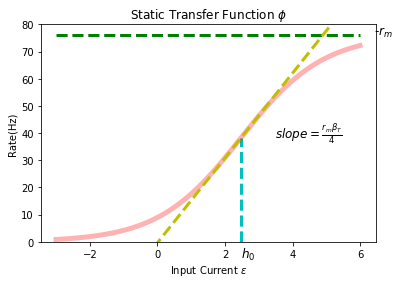

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
phi=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    phi[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    count=count+1
plt.figure()
plt.title("Static Transfer Function $\phi$")
plt.xlabel("Input Current $\epsilon$")
plt.ylabel("Rate(Hz)")
plt.ylim([0,80])
#plt.plot(np.arange(-3,6,0.01),phi_i)
plt.plot(np.arange(-3,6,0.01),phi,'-r',linewidth=5,alpha=0.3)
plt.vlines(h_0, 0,phi[int((h_0+3)/0.01)], colors = "c", linestyles = "dashed",linewidth=3)
plt.hlines(r_m,-3,6,colors='g',linestyles = "dashed",linewidth=3)
plt.text(6.4,r_m,'-$r_m$',size='12')
plt.text(h_0,-6,'$h_0$',size='12')
y_line=np.zeros(900)
count=0
slope=r_m*beta_T/4
for xi in np.arange(-3,6,0.01):
    y_line[count]=slope*xi-h_0*slope+phi[int((h_0+3)/0.01)]
    count=count+1
plt.plot(np.arange(-3,6,0.01),y_line,'--y',linewidth=3)
plt.text(h_0+1,phi[int((h_0+3)/0.01)],r'$slope=\frac{r_m \beta_T}{4}$',size='12')
plt.savefig('Figures/phi.png')

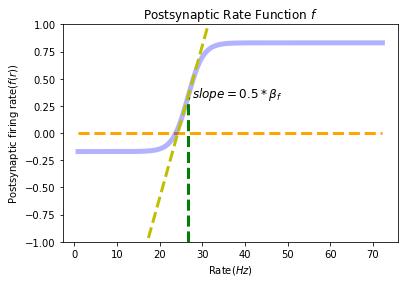

In [2]:
c=0.005
N=50000
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
f=np.zeros(900)
r=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    r[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    f[count]=0.5*(2*q_f-1+np.tanh(beta_f*(r[count]-x_f)))
    count=count+1
plt.figure()
plt.title('Postsynaptic Rate Function $f$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($f(r)$)')
plt.ylim(-1,1)
plt.plot(r,f,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_f-1)),colors="g",linestyles="dashed",linewidth=3)
f_line=np.zeros(900)
f_slope=0.5*beta_f
for count in range(900):
    f_line[count]=f_slope*(r[count]-x_f)+0.5*(2*q_f-1)
plt.plot(r,f_line,'--y',linewidth=3)
plt.text(x_f+1,(0.5*(2*q_f-1)),r'$slope=0.5*\beta_f$',size='12')
plt.savefig('Figures/f.png')

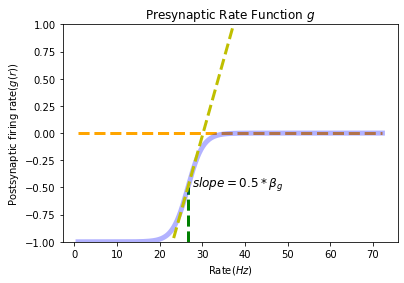

In [3]:
q_g=0
beta_g=beta_f
x_g=x_f
count=0
g=np.zeros(900)
for xi in np.arange(-3,6,0.01):
    g[count]=0.5*(2*q_g-1+np.tanh(beta_g*(r[count]-x_g)))
    count=count+1
plt.figure()
plt.title('Presynaptic Rate Function $g$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($g(r)$)')
plt.ylim(-1,1)
plt.plot(r,g,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_g-1)),colors="g",linestyles="dashed",linewidth=3)
g_line=np.zeros(900)
g_slope=0.5*beta_f
for count in range(900):
    g_line[count]=g_slope*(r[count]-x_g)+0.5*(2*q_g-1)
plt.plot(r,g_line,'--y',linewidth=3)
plt.text(x_g+1,(0.5*(2*q_g-1)),r'$slope=0.5*\beta_g$',size='12')
plt.savefig('Figures/g.png')

In [4]:
# Structral connectivity matrix
p=1
######
N=50000
######

#Firing rate pattern
C=np.zeros((N,N),dtype='int8')
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<0.005:
            C[i,j]=1
    print("Neuron:"+str(i))
print(C)

[[13.24865601 14.5464679   5.77783062 ... 18.02771177 13.54233678
   7.8175655 ]]
Neuron:0
Neuron:1
Neuron:2
Neuron:3
Neuron:4
Neuron:5
Neuron:6
Neuron:7
Neuron:8
Neuron:9
Neuron:10
Neuron:11
Neuron:12
Neuron:13
Neuron:14
Neuron:15
Neuron:16
Neuron:17
Neuron:18
Neuron:19
Neuron:20
Neuron:21
Neuron:22
Neuron:23
Neuron:24
Neuron:25
Neuron:26
Neuron:27
Neuron:28
Neuron:29
Neuron:30
Neuron:31
Neuron:32
Neuron:33
Neuron:34
Neuron:35
Neuron:36
Neuron:37
Neuron:38
Neuron:39
Neuron:40
Neuron:41
Neuron:42
Neuron:43
Neuron:44
Neuron:45
Neuron:46
Neuron:47
Neuron:48
Neuron:49
Neuron:50
Neuron:51
Neuron:52
Neuron:53
Neuron:54
Neuron:55
Neuron:56
Neuron:57
Neuron:58
Neuron:59
Neuron:60
Neuron:61
Neuron:62
Neuron:63
Neuron:64
Neuron:65
Neuron:66
Neuron:67
Neuron:68
Neuron:69
Neuron:70
Neuron:71
Neuron:72
Neuron:73
Neuron:74
Neuron:75
Neuron:76
Neuron:77
Neuron:78
Neuron:79
Neuron:80
Neuron:81
Neuron:82
Neuron:83
Neuron:84
Neuron:85
Neuron:86
Neuron:87
Neuron:88
Neuron:89
Neuron:90
Neuron:91
Neuron:9

Neuron:760
Neuron:761
Neuron:762
Neuron:763
Neuron:764
Neuron:765
Neuron:766
Neuron:767
Neuron:768
Neuron:769
Neuron:770
Neuron:771
Neuron:772
Neuron:773
Neuron:774
Neuron:775
Neuron:776
Neuron:777
Neuron:778
Neuron:779
Neuron:780
Neuron:781
Neuron:782
Neuron:783
Neuron:784
Neuron:785
Neuron:786
Neuron:787
Neuron:788
Neuron:789
Neuron:790
Neuron:791
Neuron:792
Neuron:793
Neuron:794
Neuron:795
Neuron:796
Neuron:797
Neuron:798
Neuron:799
Neuron:800
Neuron:801
Neuron:802
Neuron:803
Neuron:804
Neuron:805
Neuron:806
Neuron:807
Neuron:808
Neuron:809
Neuron:810
Neuron:811
Neuron:812
Neuron:813
Neuron:814
Neuron:815
Neuron:816
Neuron:817
Neuron:818
Neuron:819
Neuron:820
Neuron:821
Neuron:822
Neuron:823
Neuron:824
Neuron:825
Neuron:826
Neuron:827
Neuron:828
Neuron:829
Neuron:830
Neuron:831
Neuron:832
Neuron:833
Neuron:834
Neuron:835
Neuron:836
Neuron:837
Neuron:838
Neuron:839
Neuron:840
Neuron:841
Neuron:842
Neuron:843
Neuron:844
Neuron:845
Neuron:846
Neuron:847
Neuron:848
Neuron:849
Neuron:850

Neuron:1469
Neuron:1470
Neuron:1471
Neuron:1472
Neuron:1473
Neuron:1474
Neuron:1475
Neuron:1476
Neuron:1477
Neuron:1478
Neuron:1479
Neuron:1480
Neuron:1481
Neuron:1482
Neuron:1483
Neuron:1484
Neuron:1485
Neuron:1486
Neuron:1487
Neuron:1488
Neuron:1489
Neuron:1490
Neuron:1491
Neuron:1492
Neuron:1493
Neuron:1494
Neuron:1495
Neuron:1496
Neuron:1497
Neuron:1498
Neuron:1499
Neuron:1500
Neuron:1501
Neuron:1502
Neuron:1503
Neuron:1504
Neuron:1505
Neuron:1506
Neuron:1507
Neuron:1508
Neuron:1509
Neuron:1510
Neuron:1511
Neuron:1512
Neuron:1513
Neuron:1514
Neuron:1515
Neuron:1516
Neuron:1517
Neuron:1518
Neuron:1519
Neuron:1520
Neuron:1521
Neuron:1522
Neuron:1523
Neuron:1524
Neuron:1525
Neuron:1526
Neuron:1527
Neuron:1528
Neuron:1529
Neuron:1530
Neuron:1531
Neuron:1532
Neuron:1533
Neuron:1534
Neuron:1535
Neuron:1536
Neuron:1537
Neuron:1538
Neuron:1539
Neuron:1540
Neuron:1541
Neuron:1542
Neuron:1543
Neuron:1544
Neuron:1545
Neuron:1546
Neuron:1547
Neuron:1548
Neuron:1549
Neuron:1550
Neuron:1551
Neur

Neuron:2168
Neuron:2169
Neuron:2170
Neuron:2171
Neuron:2172
Neuron:2173
Neuron:2174
Neuron:2175
Neuron:2176
Neuron:2177
Neuron:2178
Neuron:2179
Neuron:2180
Neuron:2181
Neuron:2182
Neuron:2183
Neuron:2184
Neuron:2185
Neuron:2186
Neuron:2187
Neuron:2188
Neuron:2189
Neuron:2190
Neuron:2191
Neuron:2192
Neuron:2193
Neuron:2194
Neuron:2195
Neuron:2196
Neuron:2197
Neuron:2198
Neuron:2199
Neuron:2200
Neuron:2201
Neuron:2202
Neuron:2203
Neuron:2204
Neuron:2205
Neuron:2206
Neuron:2207
Neuron:2208
Neuron:2209
Neuron:2210
Neuron:2211
Neuron:2212
Neuron:2213
Neuron:2214
Neuron:2215
Neuron:2216
Neuron:2217
Neuron:2218
Neuron:2219
Neuron:2220
Neuron:2221
Neuron:2222
Neuron:2223
Neuron:2224
Neuron:2225
Neuron:2226
Neuron:2227
Neuron:2228
Neuron:2229
Neuron:2230
Neuron:2231
Neuron:2232
Neuron:2233
Neuron:2234
Neuron:2235
Neuron:2236
Neuron:2237
Neuron:2238
Neuron:2239
Neuron:2240
Neuron:2241
Neuron:2242
Neuron:2243
Neuron:2244
Neuron:2245
Neuron:2246
Neuron:2247
Neuron:2248
Neuron:2249
Neuron:2250
Neur

Neuron:2855
Neuron:2856
Neuron:2857
Neuron:2858
Neuron:2859
Neuron:2860
Neuron:2861
Neuron:2862
Neuron:2863
Neuron:2864
Neuron:2865
Neuron:2866
Neuron:2867
Neuron:2868
Neuron:2869
Neuron:2870
Neuron:2871
Neuron:2872
Neuron:2873
Neuron:2874
Neuron:2875
Neuron:2876
Neuron:2877
Neuron:2878
Neuron:2879
Neuron:2880
Neuron:2881
Neuron:2882
Neuron:2883
Neuron:2884
Neuron:2885
Neuron:2886
Neuron:2887
Neuron:2888
Neuron:2889
Neuron:2890
Neuron:2891
Neuron:2892
Neuron:2893
Neuron:2894
Neuron:2895
Neuron:2896
Neuron:2897
Neuron:2898
Neuron:2899
Neuron:2900
Neuron:2901
Neuron:2902
Neuron:2903
Neuron:2904
Neuron:2905
Neuron:2906
Neuron:2907
Neuron:2908
Neuron:2909
Neuron:2910
Neuron:2911
Neuron:2912
Neuron:2913
Neuron:2914
Neuron:2915
Neuron:2916
Neuron:2917
Neuron:2918
Neuron:2919
Neuron:2920
Neuron:2921
Neuron:2922
Neuron:2923
Neuron:2924
Neuron:2925
Neuron:2926
Neuron:2927
Neuron:2928
Neuron:2929
Neuron:2930
Neuron:2931
Neuron:2932
Neuron:2933
Neuron:2934
Neuron:2935
Neuron:2936
Neuron:2937
Neur

Neuron:3550
Neuron:3551
Neuron:3552
Neuron:3553
Neuron:3554
Neuron:3555
Neuron:3556
Neuron:3557
Neuron:3558
Neuron:3559
Neuron:3560
Neuron:3561
Neuron:3562
Neuron:3563
Neuron:3564
Neuron:3565
Neuron:3566
Neuron:3567
Neuron:3568
Neuron:3569
Neuron:3570
Neuron:3571
Neuron:3572
Neuron:3573
Neuron:3574
Neuron:3575
Neuron:3576
Neuron:3577
Neuron:3578
Neuron:3579
Neuron:3580
Neuron:3581
Neuron:3582
Neuron:3583
Neuron:3584
Neuron:3585
Neuron:3586
Neuron:3587
Neuron:3588
Neuron:3589
Neuron:3590
Neuron:3591
Neuron:3592
Neuron:3593
Neuron:3594
Neuron:3595
Neuron:3596
Neuron:3597
Neuron:3598
Neuron:3599
Neuron:3600
Neuron:3601
Neuron:3602
Neuron:3603
Neuron:3604
Neuron:3605
Neuron:3606
Neuron:3607
Neuron:3608
Neuron:3609
Neuron:3610
Neuron:3611
Neuron:3612
Neuron:3613
Neuron:3614
Neuron:3615
Neuron:3616
Neuron:3617
Neuron:3618
Neuron:3619
Neuron:3620
Neuron:3621
Neuron:3622
Neuron:3623
Neuron:3624
Neuron:3625
Neuron:3626
Neuron:3627
Neuron:3628
Neuron:3629
Neuron:3630
Neuron:3631
Neuron:3632
Neur

Neuron:4240
Neuron:4241
Neuron:4242
Neuron:4243
Neuron:4244
Neuron:4245
Neuron:4246
Neuron:4247
Neuron:4248
Neuron:4249
Neuron:4250
Neuron:4251
Neuron:4252
Neuron:4253
Neuron:4254
Neuron:4255
Neuron:4256
Neuron:4257
Neuron:4258
Neuron:4259
Neuron:4260
Neuron:4261
Neuron:4262
Neuron:4263
Neuron:4264
Neuron:4265
Neuron:4266
Neuron:4267
Neuron:4268
Neuron:4269
Neuron:4270
Neuron:4271
Neuron:4272
Neuron:4273
Neuron:4274
Neuron:4275
Neuron:4276
Neuron:4277
Neuron:4278
Neuron:4279
Neuron:4280
Neuron:4281
Neuron:4282
Neuron:4283
Neuron:4284
Neuron:4285
Neuron:4286
Neuron:4287
Neuron:4288
Neuron:4289
Neuron:4290
Neuron:4291
Neuron:4292
Neuron:4293
Neuron:4294
Neuron:4295
Neuron:4296
Neuron:4297
Neuron:4298
Neuron:4299
Neuron:4300
Neuron:4301
Neuron:4302
Neuron:4303
Neuron:4304
Neuron:4305
Neuron:4306
Neuron:4307
Neuron:4308
Neuron:4309
Neuron:4310
Neuron:4311
Neuron:4312
Neuron:4313
Neuron:4314
Neuron:4315
Neuron:4316
Neuron:4317
Neuron:4318
Neuron:4319
Neuron:4320
Neuron:4321
Neuron:4322
Neur

Neuron:4931
Neuron:4932
Neuron:4933
Neuron:4934
Neuron:4935
Neuron:4936
Neuron:4937
Neuron:4938
Neuron:4939
Neuron:4940
Neuron:4941
Neuron:4942
Neuron:4943
Neuron:4944
Neuron:4945
Neuron:4946
Neuron:4947
Neuron:4948
Neuron:4949
Neuron:4950
Neuron:4951
Neuron:4952
Neuron:4953
Neuron:4954
Neuron:4955
Neuron:4956
Neuron:4957
Neuron:4958
Neuron:4959
Neuron:4960
Neuron:4961
Neuron:4962
Neuron:4963
Neuron:4964
Neuron:4965
Neuron:4966
Neuron:4967
Neuron:4968
Neuron:4969
Neuron:4970
Neuron:4971
Neuron:4972
Neuron:4973
Neuron:4974
Neuron:4975
Neuron:4976
Neuron:4977
Neuron:4978
Neuron:4979
Neuron:4980
Neuron:4981
Neuron:4982
Neuron:4983
Neuron:4984
Neuron:4985
Neuron:4986
Neuron:4987
Neuron:4988
Neuron:4989
Neuron:4990
Neuron:4991
Neuron:4992
Neuron:4993
Neuron:4994
Neuron:4995
Neuron:4996
Neuron:4997
Neuron:4998
Neuron:4999
Neuron:5000
Neuron:5001
Neuron:5002
Neuron:5003
Neuron:5004
Neuron:5005
Neuron:5006
Neuron:5007
Neuron:5008
Neuron:5009
Neuron:5010
Neuron:5011
Neuron:5012
Neuron:5013
Neur

Neuron:5615
Neuron:5616
Neuron:5617
Neuron:5618
Neuron:5619
Neuron:5620
Neuron:5621
Neuron:5622
Neuron:5623
Neuron:5624
Neuron:5625
Neuron:5626
Neuron:5627
Neuron:5628
Neuron:5629
Neuron:5630
Neuron:5631
Neuron:5632
Neuron:5633
Neuron:5634
Neuron:5635
Neuron:5636
Neuron:5637
Neuron:5638
Neuron:5639
Neuron:5640
Neuron:5641
Neuron:5642
Neuron:5643
Neuron:5644
Neuron:5645
Neuron:5646
Neuron:5647
Neuron:5648
Neuron:5649
Neuron:5650
Neuron:5651
Neuron:5652
Neuron:5653
Neuron:5654
Neuron:5655
Neuron:5656
Neuron:5657
Neuron:5658
Neuron:5659
Neuron:5660
Neuron:5661
Neuron:5662
Neuron:5663
Neuron:5664
Neuron:5665
Neuron:5666
Neuron:5667
Neuron:5668
Neuron:5669
Neuron:5670
Neuron:5671
Neuron:5672
Neuron:5673
Neuron:5674
Neuron:5675
Neuron:5676
Neuron:5677
Neuron:5678
Neuron:5679
Neuron:5680
Neuron:5681
Neuron:5682
Neuron:5683
Neuron:5684
Neuron:5685
Neuron:5686
Neuron:5687
Neuron:5688
Neuron:5689
Neuron:5690
Neuron:5691
Neuron:5692
Neuron:5693
Neuron:5694
Neuron:5695
Neuron:5696
Neuron:5697
Neur

Neuron:6308
Neuron:6309
Neuron:6310
Neuron:6311
Neuron:6312
Neuron:6313
Neuron:6314
Neuron:6315
Neuron:6316
Neuron:6317
Neuron:6318
Neuron:6319
Neuron:6320
Neuron:6321
Neuron:6322
Neuron:6323
Neuron:6324
Neuron:6325
Neuron:6326
Neuron:6327
Neuron:6328
Neuron:6329
Neuron:6330
Neuron:6331
Neuron:6332
Neuron:6333
Neuron:6334
Neuron:6335
Neuron:6336
Neuron:6337
Neuron:6338
Neuron:6339
Neuron:6340
Neuron:6341
Neuron:6342
Neuron:6343
Neuron:6344
Neuron:6345
Neuron:6346
Neuron:6347
Neuron:6348
Neuron:6349
Neuron:6350
Neuron:6351
Neuron:6352
Neuron:6353
Neuron:6354
Neuron:6355
Neuron:6356
Neuron:6357
Neuron:6358
Neuron:6359
Neuron:6360
Neuron:6361
Neuron:6362
Neuron:6363
Neuron:6364
Neuron:6365
Neuron:6366
Neuron:6367
Neuron:6368
Neuron:6369
Neuron:6370
Neuron:6371
Neuron:6372
Neuron:6373
Neuron:6374
Neuron:6375
Neuron:6376
Neuron:6377
Neuron:6378
Neuron:6379
Neuron:6380
Neuron:6381
Neuron:6382
Neuron:6383
Neuron:6384
Neuron:6385
Neuron:6386
Neuron:6387
Neuron:6388
Neuron:6389
Neuron:6390
Neur

Neuron:6994
Neuron:6995
Neuron:6996
Neuron:6997
Neuron:6998
Neuron:6999
Neuron:7000
Neuron:7001
Neuron:7002
Neuron:7003
Neuron:7004
Neuron:7005
Neuron:7006
Neuron:7007
Neuron:7008
Neuron:7009
Neuron:7010
Neuron:7011
Neuron:7012
Neuron:7013
Neuron:7014
Neuron:7015
Neuron:7016
Neuron:7017
Neuron:7018
Neuron:7019
Neuron:7020
Neuron:7021
Neuron:7022
Neuron:7023
Neuron:7024
Neuron:7025
Neuron:7026
Neuron:7027
Neuron:7028
Neuron:7029
Neuron:7030
Neuron:7031
Neuron:7032
Neuron:7033
Neuron:7034
Neuron:7035
Neuron:7036
Neuron:7037
Neuron:7038
Neuron:7039
Neuron:7040
Neuron:7041
Neuron:7042
Neuron:7043
Neuron:7044
Neuron:7045
Neuron:7046
Neuron:7047
Neuron:7048
Neuron:7049
Neuron:7050
Neuron:7051
Neuron:7052
Neuron:7053
Neuron:7054
Neuron:7055
Neuron:7056
Neuron:7057
Neuron:7058
Neuron:7059
Neuron:7060
Neuron:7061
Neuron:7062
Neuron:7063
Neuron:7064
Neuron:7065
Neuron:7066
Neuron:7067
Neuron:7068
Neuron:7069
Neuron:7070
Neuron:7071
Neuron:7072
Neuron:7073
Neuron:7074
Neuron:7075
Neuron:7076
Neur

Neuron:7682
Neuron:7683
Neuron:7684
Neuron:7685
Neuron:7686
Neuron:7687
Neuron:7688
Neuron:7689
Neuron:7690
Neuron:7691
Neuron:7692
Neuron:7693
Neuron:7694
Neuron:7695
Neuron:7696
Neuron:7697
Neuron:7698
Neuron:7699
Neuron:7700
Neuron:7701
Neuron:7702
Neuron:7703
Neuron:7704
Neuron:7705
Neuron:7706
Neuron:7707
Neuron:7708
Neuron:7709
Neuron:7710
Neuron:7711
Neuron:7712
Neuron:7713
Neuron:7714
Neuron:7715
Neuron:7716
Neuron:7717
Neuron:7718
Neuron:7719
Neuron:7720
Neuron:7721
Neuron:7722
Neuron:7723
Neuron:7724
Neuron:7725
Neuron:7726
Neuron:7727
Neuron:7728
Neuron:7729
Neuron:7730
Neuron:7731
Neuron:7732
Neuron:7733
Neuron:7734
Neuron:7735
Neuron:7736
Neuron:7737
Neuron:7738
Neuron:7739
Neuron:7740
Neuron:7741
Neuron:7742
Neuron:7743
Neuron:7744
Neuron:7745
Neuron:7746
Neuron:7747
Neuron:7748
Neuron:7749
Neuron:7750
Neuron:7751
Neuron:7752
Neuron:7753
Neuron:7754
Neuron:7755
Neuron:7756
Neuron:7757
Neuron:7758
Neuron:7759
Neuron:7760
Neuron:7761
Neuron:7762
Neuron:7763
Neuron:7764
Neur

Neuron:8374
Neuron:8375
Neuron:8376
Neuron:8377
Neuron:8378
Neuron:8379
Neuron:8380
Neuron:8381
Neuron:8382
Neuron:8383
Neuron:8384
Neuron:8385
Neuron:8386
Neuron:8387
Neuron:8388
Neuron:8389
Neuron:8390
Neuron:8391
Neuron:8392
Neuron:8393
Neuron:8394
Neuron:8395
Neuron:8396
Neuron:8397
Neuron:8398
Neuron:8399
Neuron:8400
Neuron:8401
Neuron:8402
Neuron:8403
Neuron:8404
Neuron:8405
Neuron:8406
Neuron:8407
Neuron:8408
Neuron:8409
Neuron:8410
Neuron:8411
Neuron:8412
Neuron:8413
Neuron:8414
Neuron:8415
Neuron:8416
Neuron:8417
Neuron:8418
Neuron:8419
Neuron:8420
Neuron:8421
Neuron:8422
Neuron:8423
Neuron:8424
Neuron:8425
Neuron:8426
Neuron:8427
Neuron:8428
Neuron:8429
Neuron:8430
Neuron:8431
Neuron:8432
Neuron:8433
Neuron:8434
Neuron:8435
Neuron:8436
Neuron:8437
Neuron:8438
Neuron:8439
Neuron:8440
Neuron:8441
Neuron:8442
Neuron:8443
Neuron:8444
Neuron:8445
Neuron:8446
Neuron:8447
Neuron:8448
Neuron:8449
Neuron:8450
Neuron:8451
Neuron:8452
Neuron:8453
Neuron:8454
Neuron:8455
Neuron:8456
Neur

Neuron:9072
Neuron:9073
Neuron:9074
Neuron:9075
Neuron:9076
Neuron:9077
Neuron:9078
Neuron:9079
Neuron:9080
Neuron:9081
Neuron:9082
Neuron:9083
Neuron:9084
Neuron:9085
Neuron:9086
Neuron:9087
Neuron:9088
Neuron:9089
Neuron:9090
Neuron:9091
Neuron:9092
Neuron:9093
Neuron:9094
Neuron:9095
Neuron:9096
Neuron:9097
Neuron:9098
Neuron:9099
Neuron:9100
Neuron:9101
Neuron:9102
Neuron:9103
Neuron:9104
Neuron:9105
Neuron:9106
Neuron:9107
Neuron:9108
Neuron:9109
Neuron:9110
Neuron:9111
Neuron:9112
Neuron:9113
Neuron:9114
Neuron:9115
Neuron:9116
Neuron:9117
Neuron:9118
Neuron:9119
Neuron:9120
Neuron:9121
Neuron:9122
Neuron:9123
Neuron:9124
Neuron:9125
Neuron:9126
Neuron:9127
Neuron:9128
Neuron:9129
Neuron:9130
Neuron:9131
Neuron:9132
Neuron:9133
Neuron:9134
Neuron:9135
Neuron:9136
Neuron:9137
Neuron:9138
Neuron:9139
Neuron:9140
Neuron:9141
Neuron:9142
Neuron:9143
Neuron:9144
Neuron:9145
Neuron:9146
Neuron:9147
Neuron:9148
Neuron:9149
Neuron:9150
Neuron:9151
Neuron:9152
Neuron:9153
Neuron:9154
Neur

Neuron:9766
Neuron:9767
Neuron:9768
Neuron:9769
Neuron:9770
Neuron:9771
Neuron:9772
Neuron:9773
Neuron:9774
Neuron:9775
Neuron:9776
Neuron:9777
Neuron:9778
Neuron:9779
Neuron:9780
Neuron:9781
Neuron:9782
Neuron:9783
Neuron:9784
Neuron:9785
Neuron:9786
Neuron:9787
Neuron:9788
Neuron:9789
Neuron:9790
Neuron:9791
Neuron:9792
Neuron:9793
Neuron:9794
Neuron:9795
Neuron:9796
Neuron:9797
Neuron:9798
Neuron:9799
Neuron:9800
Neuron:9801
Neuron:9802
Neuron:9803
Neuron:9804
Neuron:9805
Neuron:9806
Neuron:9807
Neuron:9808
Neuron:9809
Neuron:9810
Neuron:9811
Neuron:9812
Neuron:9813
Neuron:9814
Neuron:9815
Neuron:9816
Neuron:9817
Neuron:9818
Neuron:9819
Neuron:9820
Neuron:9821
Neuron:9822
Neuron:9823
Neuron:9824
Neuron:9825
Neuron:9826
Neuron:9827
Neuron:9828
Neuron:9829
Neuron:9830
Neuron:9831
Neuron:9832
Neuron:9833
Neuron:9834
Neuron:9835
Neuron:9836
Neuron:9837
Neuron:9838
Neuron:9839
Neuron:9840
Neuron:9841
Neuron:9842
Neuron:9843
Neuron:9844
Neuron:9845
Neuron:9846
Neuron:9847
Neuron:9848
Neur

Neuron:10433
Neuron:10434
Neuron:10435
Neuron:10436
Neuron:10437
Neuron:10438
Neuron:10439
Neuron:10440
Neuron:10441
Neuron:10442
Neuron:10443
Neuron:10444
Neuron:10445
Neuron:10446
Neuron:10447
Neuron:10448
Neuron:10449
Neuron:10450
Neuron:10451
Neuron:10452
Neuron:10453
Neuron:10454
Neuron:10455
Neuron:10456
Neuron:10457
Neuron:10458
Neuron:10459
Neuron:10460
Neuron:10461
Neuron:10462
Neuron:10463
Neuron:10464
Neuron:10465
Neuron:10466
Neuron:10467
Neuron:10468
Neuron:10469
Neuron:10470
Neuron:10471
Neuron:10472
Neuron:10473
Neuron:10474
Neuron:10475
Neuron:10476
Neuron:10477
Neuron:10478
Neuron:10479
Neuron:10480
Neuron:10481
Neuron:10482
Neuron:10483
Neuron:10484
Neuron:10485
Neuron:10486
Neuron:10487
Neuron:10488
Neuron:10489
Neuron:10490
Neuron:10491
Neuron:10492
Neuron:10493
Neuron:10494
Neuron:10495
Neuron:10496
Neuron:10497
Neuron:10498
Neuron:10499
Neuron:10500
Neuron:10501
Neuron:10502
Neuron:10503
Neuron:10504
Neuron:10505
Neuron:10506
Neuron:10507
Neuron:10508
Neuron:10509

Neuron:11080
Neuron:11081
Neuron:11082
Neuron:11083
Neuron:11084
Neuron:11085
Neuron:11086
Neuron:11087
Neuron:11088
Neuron:11089
Neuron:11090
Neuron:11091
Neuron:11092
Neuron:11093
Neuron:11094
Neuron:11095
Neuron:11096
Neuron:11097
Neuron:11098
Neuron:11099
Neuron:11100
Neuron:11101
Neuron:11102
Neuron:11103
Neuron:11104
Neuron:11105
Neuron:11106
Neuron:11107
Neuron:11108
Neuron:11109
Neuron:11110
Neuron:11111
Neuron:11112
Neuron:11113
Neuron:11114
Neuron:11115
Neuron:11116
Neuron:11117
Neuron:11118
Neuron:11119
Neuron:11120
Neuron:11121
Neuron:11122
Neuron:11123
Neuron:11124
Neuron:11125
Neuron:11126
Neuron:11127
Neuron:11128
Neuron:11129
Neuron:11130
Neuron:11131
Neuron:11132
Neuron:11133
Neuron:11134
Neuron:11135
Neuron:11136
Neuron:11137
Neuron:11138
Neuron:11139
Neuron:11140
Neuron:11141
Neuron:11142
Neuron:11143
Neuron:11144
Neuron:11145
Neuron:11146
Neuron:11147
Neuron:11148
Neuron:11149
Neuron:11150
Neuron:11151
Neuron:11152
Neuron:11153
Neuron:11154
Neuron:11155
Neuron:11156

Neuron:11715
Neuron:11716
Neuron:11717
Neuron:11718
Neuron:11719
Neuron:11720
Neuron:11721
Neuron:11722
Neuron:11723
Neuron:11724
Neuron:11725
Neuron:11726
Neuron:11727
Neuron:11728
Neuron:11729
Neuron:11730
Neuron:11731
Neuron:11732
Neuron:11733
Neuron:11734
Neuron:11735
Neuron:11736
Neuron:11737
Neuron:11738
Neuron:11739
Neuron:11740
Neuron:11741
Neuron:11742
Neuron:11743
Neuron:11744
Neuron:11745
Neuron:11746
Neuron:11747
Neuron:11748
Neuron:11749
Neuron:11750
Neuron:11751
Neuron:11752
Neuron:11753
Neuron:11754
Neuron:11755
Neuron:11756
Neuron:11757
Neuron:11758
Neuron:11759
Neuron:11760
Neuron:11761
Neuron:11762
Neuron:11763
Neuron:11764
Neuron:11765
Neuron:11766
Neuron:11767
Neuron:11768
Neuron:11769
Neuron:11770
Neuron:11771
Neuron:11772
Neuron:11773
Neuron:11774
Neuron:11775
Neuron:11776
Neuron:11777
Neuron:11778
Neuron:11779
Neuron:11780
Neuron:11781
Neuron:11782
Neuron:11783
Neuron:11784
Neuron:11785
Neuron:11786
Neuron:11787
Neuron:11788
Neuron:11789
Neuron:11790
Neuron:11791

Neuron:12358
Neuron:12359
Neuron:12360
Neuron:12361
Neuron:12362
Neuron:12363
Neuron:12364
Neuron:12365
Neuron:12366
Neuron:12367
Neuron:12368
Neuron:12369
Neuron:12370
Neuron:12371
Neuron:12372
Neuron:12373
Neuron:12374
Neuron:12375
Neuron:12376
Neuron:12377
Neuron:12378
Neuron:12379
Neuron:12380
Neuron:12381
Neuron:12382
Neuron:12383
Neuron:12384
Neuron:12385
Neuron:12386
Neuron:12387
Neuron:12388
Neuron:12389
Neuron:12390
Neuron:12391
Neuron:12392
Neuron:12393
Neuron:12394
Neuron:12395
Neuron:12396
Neuron:12397
Neuron:12398
Neuron:12399
Neuron:12400
Neuron:12401
Neuron:12402
Neuron:12403
Neuron:12404
Neuron:12405
Neuron:12406
Neuron:12407
Neuron:12408
Neuron:12409
Neuron:12410
Neuron:12411
Neuron:12412
Neuron:12413
Neuron:12414
Neuron:12415
Neuron:12416
Neuron:12417
Neuron:12418
Neuron:12419
Neuron:12420
Neuron:12421
Neuron:12422
Neuron:12423
Neuron:12424
Neuron:12425
Neuron:12426
Neuron:12427
Neuron:12428
Neuron:12429
Neuron:12430
Neuron:12431
Neuron:12432
Neuron:12433
Neuron:12434

Neuron:13006
Neuron:13007
Neuron:13008
Neuron:13009
Neuron:13010
Neuron:13011
Neuron:13012
Neuron:13013
Neuron:13014
Neuron:13015
Neuron:13016
Neuron:13017
Neuron:13018
Neuron:13019
Neuron:13020
Neuron:13021
Neuron:13022
Neuron:13023
Neuron:13024
Neuron:13025
Neuron:13026
Neuron:13027
Neuron:13028
Neuron:13029
Neuron:13030
Neuron:13031
Neuron:13032
Neuron:13033
Neuron:13034
Neuron:13035
Neuron:13036
Neuron:13037
Neuron:13038
Neuron:13039
Neuron:13040
Neuron:13041
Neuron:13042
Neuron:13043
Neuron:13044
Neuron:13045
Neuron:13046
Neuron:13047
Neuron:13048
Neuron:13049
Neuron:13050
Neuron:13051
Neuron:13052
Neuron:13053
Neuron:13054
Neuron:13055
Neuron:13056
Neuron:13057
Neuron:13058
Neuron:13059
Neuron:13060
Neuron:13061
Neuron:13062
Neuron:13063
Neuron:13064
Neuron:13065
Neuron:13066
Neuron:13067
Neuron:13068
Neuron:13069
Neuron:13070
Neuron:13071
Neuron:13072
Neuron:13073
Neuron:13074
Neuron:13075
Neuron:13076
Neuron:13077
Neuron:13078
Neuron:13079
Neuron:13080
Neuron:13081
Neuron:13082

Neuron:13647
Neuron:13648
Neuron:13649
Neuron:13650
Neuron:13651
Neuron:13652
Neuron:13653
Neuron:13654
Neuron:13655
Neuron:13656
Neuron:13657
Neuron:13658
Neuron:13659
Neuron:13660
Neuron:13661
Neuron:13662
Neuron:13663
Neuron:13664
Neuron:13665
Neuron:13666
Neuron:13667
Neuron:13668
Neuron:13669
Neuron:13670
Neuron:13671
Neuron:13672
Neuron:13673
Neuron:13674
Neuron:13675
Neuron:13676
Neuron:13677
Neuron:13678
Neuron:13679
Neuron:13680
Neuron:13681
Neuron:13682
Neuron:13683
Neuron:13684
Neuron:13685
Neuron:13686
Neuron:13687
Neuron:13688
Neuron:13689
Neuron:13690
Neuron:13691
Neuron:13692
Neuron:13693
Neuron:13694
Neuron:13695
Neuron:13696
Neuron:13697
Neuron:13698
Neuron:13699
Neuron:13700
Neuron:13701
Neuron:13702
Neuron:13703
Neuron:13704
Neuron:13705
Neuron:13706
Neuron:13707
Neuron:13708
Neuron:13709
Neuron:13710
Neuron:13711
Neuron:13712
Neuron:13713
Neuron:13714
Neuron:13715
Neuron:13716
Neuron:13717
Neuron:13718
Neuron:13719
Neuron:13720
Neuron:13721
Neuron:13722
Neuron:13723

Neuron:14279
Neuron:14280
Neuron:14281
Neuron:14282
Neuron:14283
Neuron:14284
Neuron:14285
Neuron:14286
Neuron:14287
Neuron:14288
Neuron:14289
Neuron:14290
Neuron:14291
Neuron:14292
Neuron:14293
Neuron:14294
Neuron:14295
Neuron:14296
Neuron:14297
Neuron:14298
Neuron:14299
Neuron:14300
Neuron:14301
Neuron:14302
Neuron:14303
Neuron:14304
Neuron:14305
Neuron:14306
Neuron:14307
Neuron:14308
Neuron:14309
Neuron:14310
Neuron:14311
Neuron:14312
Neuron:14313
Neuron:14314
Neuron:14315
Neuron:14316
Neuron:14317
Neuron:14318
Neuron:14319
Neuron:14320
Neuron:14321
Neuron:14322
Neuron:14323
Neuron:14324
Neuron:14325
Neuron:14326
Neuron:14327
Neuron:14328
Neuron:14329
Neuron:14330
Neuron:14331
Neuron:14332
Neuron:14333
Neuron:14334
Neuron:14335
Neuron:14336
Neuron:14337
Neuron:14338
Neuron:14339
Neuron:14340
Neuron:14341
Neuron:14342
Neuron:14343
Neuron:14344
Neuron:14345
Neuron:14346
Neuron:14347
Neuron:14348
Neuron:14349
Neuron:14350
Neuron:14351
Neuron:14352
Neuron:14353
Neuron:14354
Neuron:14355

Neuron:14924
Neuron:14925
Neuron:14926
Neuron:14927
Neuron:14928
Neuron:14929
Neuron:14930
Neuron:14931
Neuron:14932
Neuron:14933
Neuron:14934
Neuron:14935
Neuron:14936
Neuron:14937
Neuron:14938
Neuron:14939
Neuron:14940
Neuron:14941
Neuron:14942
Neuron:14943
Neuron:14944
Neuron:14945
Neuron:14946
Neuron:14947
Neuron:14948
Neuron:14949
Neuron:14950
Neuron:14951
Neuron:14952
Neuron:14953
Neuron:14954
Neuron:14955
Neuron:14956
Neuron:14957
Neuron:14958
Neuron:14959
Neuron:14960
Neuron:14961
Neuron:14962
Neuron:14963
Neuron:14964
Neuron:14965
Neuron:14966
Neuron:14967
Neuron:14968
Neuron:14969
Neuron:14970
Neuron:14971
Neuron:14972
Neuron:14973
Neuron:14974
Neuron:14975
Neuron:14976
Neuron:14977
Neuron:14978
Neuron:14979
Neuron:14980
Neuron:14981
Neuron:14982
Neuron:14983
Neuron:14984
Neuron:14985
Neuron:14986
Neuron:14987
Neuron:14988
Neuron:14989
Neuron:14990
Neuron:14991
Neuron:14992
Neuron:14993
Neuron:14994
Neuron:14995
Neuron:14996
Neuron:14997
Neuron:14998
Neuron:14999
Neuron:15000

Neuron:15570
Neuron:15571
Neuron:15572
Neuron:15573
Neuron:15574
Neuron:15575
Neuron:15576
Neuron:15577
Neuron:15578
Neuron:15579
Neuron:15580
Neuron:15581
Neuron:15582
Neuron:15583
Neuron:15584
Neuron:15585
Neuron:15586
Neuron:15587
Neuron:15588
Neuron:15589
Neuron:15590
Neuron:15591
Neuron:15592
Neuron:15593
Neuron:15594
Neuron:15595
Neuron:15596
Neuron:15597
Neuron:15598
Neuron:15599
Neuron:15600
Neuron:15601
Neuron:15602
Neuron:15603
Neuron:15604
Neuron:15605
Neuron:15606
Neuron:15607
Neuron:15608
Neuron:15609
Neuron:15610
Neuron:15611
Neuron:15612
Neuron:15613
Neuron:15614
Neuron:15615
Neuron:15616
Neuron:15617
Neuron:15618
Neuron:15619
Neuron:15620
Neuron:15621
Neuron:15622
Neuron:15623
Neuron:15624
Neuron:15625
Neuron:15626
Neuron:15627
Neuron:15628
Neuron:15629
Neuron:15630
Neuron:15631
Neuron:15632
Neuron:15633
Neuron:15634
Neuron:15635
Neuron:15636
Neuron:15637
Neuron:15638
Neuron:15639
Neuron:15640
Neuron:15641
Neuron:15642
Neuron:15643
Neuron:15644
Neuron:15645
Neuron:15646

Neuron:16215
Neuron:16216
Neuron:16217
Neuron:16218
Neuron:16219
Neuron:16220
Neuron:16221
Neuron:16222
Neuron:16223
Neuron:16224
Neuron:16225
Neuron:16226
Neuron:16227
Neuron:16228
Neuron:16229
Neuron:16230
Neuron:16231
Neuron:16232
Neuron:16233
Neuron:16234
Neuron:16235
Neuron:16236
Neuron:16237
Neuron:16238
Neuron:16239
Neuron:16240
Neuron:16241
Neuron:16242
Neuron:16243
Neuron:16244
Neuron:16245
Neuron:16246
Neuron:16247
Neuron:16248
Neuron:16249
Neuron:16250
Neuron:16251
Neuron:16252
Neuron:16253
Neuron:16254
Neuron:16255
Neuron:16256
Neuron:16257
Neuron:16258
Neuron:16259
Neuron:16260
Neuron:16261
Neuron:16262
Neuron:16263
Neuron:16264
Neuron:16265
Neuron:16266
Neuron:16267
Neuron:16268
Neuron:16269
Neuron:16270
Neuron:16271
Neuron:16272
Neuron:16273
Neuron:16274
Neuron:16275
Neuron:16276
Neuron:16277
Neuron:16278
Neuron:16279
Neuron:16280
Neuron:16281
Neuron:16282
Neuron:16283
Neuron:16284
Neuron:16285
Neuron:16286
Neuron:16287
Neuron:16288
Neuron:16289
Neuron:16290
Neuron:16291

Neuron:16862
Neuron:16863
Neuron:16864
Neuron:16865
Neuron:16866
Neuron:16867
Neuron:16868
Neuron:16869
Neuron:16870
Neuron:16871
Neuron:16872
Neuron:16873
Neuron:16874
Neuron:16875
Neuron:16876
Neuron:16877
Neuron:16878
Neuron:16879
Neuron:16880
Neuron:16881
Neuron:16882
Neuron:16883
Neuron:16884
Neuron:16885
Neuron:16886
Neuron:16887
Neuron:16888
Neuron:16889
Neuron:16890
Neuron:16891
Neuron:16892
Neuron:16893
Neuron:16894
Neuron:16895
Neuron:16896
Neuron:16897
Neuron:16898
Neuron:16899
Neuron:16900
Neuron:16901
Neuron:16902
Neuron:16903
Neuron:16904
Neuron:16905
Neuron:16906
Neuron:16907
Neuron:16908
Neuron:16909
Neuron:16910
Neuron:16911
Neuron:16912
Neuron:16913
Neuron:16914
Neuron:16915
Neuron:16916
Neuron:16917
Neuron:16918
Neuron:16919
Neuron:16920
Neuron:16921
Neuron:16922
Neuron:16923
Neuron:16924
Neuron:16925
Neuron:16926
Neuron:16927
Neuron:16928
Neuron:16929
Neuron:16930
Neuron:16931
Neuron:16932
Neuron:16933
Neuron:16934
Neuron:16935
Neuron:16936
Neuron:16937
Neuron:16938

Neuron:17508
Neuron:17509
Neuron:17510
Neuron:17511
Neuron:17512
Neuron:17513
Neuron:17514
Neuron:17515
Neuron:17516
Neuron:17517
Neuron:17518
Neuron:17519
Neuron:17520
Neuron:17521
Neuron:17522
Neuron:17523
Neuron:17524
Neuron:17525
Neuron:17526
Neuron:17527
Neuron:17528
Neuron:17529
Neuron:17530
Neuron:17531
Neuron:17532
Neuron:17533
Neuron:17534
Neuron:17535
Neuron:17536
Neuron:17537
Neuron:17538
Neuron:17539
Neuron:17540
Neuron:17541
Neuron:17542
Neuron:17543
Neuron:17544
Neuron:17545
Neuron:17546
Neuron:17547
Neuron:17548
Neuron:17549
Neuron:17550
Neuron:17551
Neuron:17552
Neuron:17553
Neuron:17554
Neuron:17555
Neuron:17556
Neuron:17557
Neuron:17558
Neuron:17559
Neuron:17560
Neuron:17561
Neuron:17562
Neuron:17563
Neuron:17564
Neuron:17565
Neuron:17566
Neuron:17567
Neuron:17568
Neuron:17569
Neuron:17570
Neuron:17571
Neuron:17572
Neuron:17573
Neuron:17574
Neuron:17575
Neuron:17576
Neuron:17577
Neuron:17578
Neuron:17579
Neuron:17580
Neuron:17581
Neuron:17582
Neuron:17583
Neuron:17584

Neuron:18154
Neuron:18155
Neuron:18156
Neuron:18157
Neuron:18158
Neuron:18159
Neuron:18160
Neuron:18161
Neuron:18162
Neuron:18163
Neuron:18164
Neuron:18165
Neuron:18166
Neuron:18167
Neuron:18168
Neuron:18169
Neuron:18170
Neuron:18171
Neuron:18172
Neuron:18173
Neuron:18174
Neuron:18175
Neuron:18176
Neuron:18177
Neuron:18178
Neuron:18179
Neuron:18180
Neuron:18181
Neuron:18182
Neuron:18183
Neuron:18184
Neuron:18185
Neuron:18186
Neuron:18187
Neuron:18188
Neuron:18189
Neuron:18190
Neuron:18191
Neuron:18192
Neuron:18193
Neuron:18194
Neuron:18195
Neuron:18196
Neuron:18197
Neuron:18198
Neuron:18199
Neuron:18200
Neuron:18201
Neuron:18202
Neuron:18203
Neuron:18204
Neuron:18205
Neuron:18206
Neuron:18207
Neuron:18208
Neuron:18209
Neuron:18210
Neuron:18211
Neuron:18212
Neuron:18213
Neuron:18214
Neuron:18215
Neuron:18216
Neuron:18217
Neuron:18218
Neuron:18219
Neuron:18220
Neuron:18221
Neuron:18222
Neuron:18223
Neuron:18224
Neuron:18225
Neuron:18226
Neuron:18227
Neuron:18228
Neuron:18229
Neuron:18230

Neuron:18786
Neuron:18787
Neuron:18788
Neuron:18789
Neuron:18790
Neuron:18791
Neuron:18792
Neuron:18793
Neuron:18794
Neuron:18795
Neuron:18796
Neuron:18797
Neuron:18798
Neuron:18799
Neuron:18800
Neuron:18801
Neuron:18802
Neuron:18803
Neuron:18804
Neuron:18805
Neuron:18806
Neuron:18807
Neuron:18808
Neuron:18809
Neuron:18810
Neuron:18811
Neuron:18812
Neuron:18813
Neuron:18814
Neuron:18815
Neuron:18816
Neuron:18817
Neuron:18818
Neuron:18819
Neuron:18820
Neuron:18821
Neuron:18822
Neuron:18823
Neuron:18824
Neuron:18825
Neuron:18826
Neuron:18827
Neuron:18828
Neuron:18829
Neuron:18830
Neuron:18831
Neuron:18832
Neuron:18833
Neuron:18834
Neuron:18835
Neuron:18836
Neuron:18837
Neuron:18838
Neuron:18839
Neuron:18840
Neuron:18841
Neuron:18842
Neuron:18843
Neuron:18844
Neuron:18845
Neuron:18846
Neuron:18847
Neuron:18848
Neuron:18849
Neuron:18850
Neuron:18851
Neuron:18852
Neuron:18853
Neuron:18854
Neuron:18855
Neuron:18856
Neuron:18857
Neuron:18858
Neuron:18859
Neuron:18860
Neuron:18861
Neuron:18862

Neuron:19421
Neuron:19422
Neuron:19423
Neuron:19424
Neuron:19425
Neuron:19426
Neuron:19427
Neuron:19428
Neuron:19429
Neuron:19430
Neuron:19431
Neuron:19432
Neuron:19433
Neuron:19434
Neuron:19435
Neuron:19436
Neuron:19437
Neuron:19438
Neuron:19439
Neuron:19440
Neuron:19441
Neuron:19442
Neuron:19443
Neuron:19444
Neuron:19445
Neuron:19446
Neuron:19447
Neuron:19448
Neuron:19449
Neuron:19450
Neuron:19451
Neuron:19452
Neuron:19453
Neuron:19454
Neuron:19455
Neuron:19456
Neuron:19457
Neuron:19458
Neuron:19459
Neuron:19460
Neuron:19461
Neuron:19462
Neuron:19463
Neuron:19464
Neuron:19465
Neuron:19466
Neuron:19467
Neuron:19468
Neuron:19469
Neuron:19470
Neuron:19471
Neuron:19472
Neuron:19473
Neuron:19474
Neuron:19475
Neuron:19476
Neuron:19477
Neuron:19478
Neuron:19479
Neuron:19480
Neuron:19481
Neuron:19482
Neuron:19483
Neuron:19484
Neuron:19485
Neuron:19486
Neuron:19487
Neuron:19488
Neuron:19489
Neuron:19490
Neuron:19491
Neuron:19492
Neuron:19493
Neuron:19494
Neuron:19495
Neuron:19496
Neuron:19497

Neuron:20059
Neuron:20060
Neuron:20061
Neuron:20062
Neuron:20063
Neuron:20064
Neuron:20065
Neuron:20066
Neuron:20067
Neuron:20068
Neuron:20069
Neuron:20070
Neuron:20071
Neuron:20072
Neuron:20073
Neuron:20074
Neuron:20075
Neuron:20076
Neuron:20077
Neuron:20078
Neuron:20079
Neuron:20080
Neuron:20081
Neuron:20082
Neuron:20083
Neuron:20084
Neuron:20085
Neuron:20086
Neuron:20087
Neuron:20088
Neuron:20089
Neuron:20090
Neuron:20091
Neuron:20092
Neuron:20093
Neuron:20094
Neuron:20095
Neuron:20096
Neuron:20097
Neuron:20098
Neuron:20099
Neuron:20100
Neuron:20101
Neuron:20102
Neuron:20103
Neuron:20104
Neuron:20105
Neuron:20106
Neuron:20107
Neuron:20108
Neuron:20109
Neuron:20110
Neuron:20111
Neuron:20112
Neuron:20113
Neuron:20114
Neuron:20115
Neuron:20116
Neuron:20117
Neuron:20118
Neuron:20119
Neuron:20120
Neuron:20121
Neuron:20122
Neuron:20123
Neuron:20124
Neuron:20125
Neuron:20126
Neuron:20127
Neuron:20128
Neuron:20129
Neuron:20130
Neuron:20131
Neuron:20132
Neuron:20133
Neuron:20134
Neuron:20135

Neuron:20696
Neuron:20697
Neuron:20698
Neuron:20699
Neuron:20700
Neuron:20701
Neuron:20702
Neuron:20703
Neuron:20704
Neuron:20705
Neuron:20706
Neuron:20707
Neuron:20708
Neuron:20709
Neuron:20710
Neuron:20711
Neuron:20712
Neuron:20713
Neuron:20714
Neuron:20715
Neuron:20716
Neuron:20717
Neuron:20718
Neuron:20719
Neuron:20720
Neuron:20721
Neuron:20722
Neuron:20723
Neuron:20724
Neuron:20725
Neuron:20726
Neuron:20727
Neuron:20728
Neuron:20729
Neuron:20730
Neuron:20731
Neuron:20732
Neuron:20733
Neuron:20734
Neuron:20735
Neuron:20736
Neuron:20737
Neuron:20738
Neuron:20739
Neuron:20740
Neuron:20741
Neuron:20742
Neuron:20743
Neuron:20744
Neuron:20745
Neuron:20746
Neuron:20747
Neuron:20748
Neuron:20749
Neuron:20750
Neuron:20751
Neuron:20752
Neuron:20753
Neuron:20754
Neuron:20755
Neuron:20756
Neuron:20757
Neuron:20758
Neuron:20759
Neuron:20760
Neuron:20761
Neuron:20762
Neuron:20763
Neuron:20764
Neuron:20765
Neuron:20766
Neuron:20767
Neuron:20768
Neuron:20769
Neuron:20770
Neuron:20771
Neuron:20772

Neuron:21326
Neuron:21327
Neuron:21328
Neuron:21329
Neuron:21330
Neuron:21331
Neuron:21332
Neuron:21333
Neuron:21334
Neuron:21335
Neuron:21336
Neuron:21337
Neuron:21338
Neuron:21339
Neuron:21340
Neuron:21341
Neuron:21342
Neuron:21343
Neuron:21344
Neuron:21345
Neuron:21346
Neuron:21347
Neuron:21348
Neuron:21349
Neuron:21350
Neuron:21351
Neuron:21352
Neuron:21353
Neuron:21354
Neuron:21355
Neuron:21356
Neuron:21357
Neuron:21358
Neuron:21359
Neuron:21360
Neuron:21361
Neuron:21362
Neuron:21363
Neuron:21364
Neuron:21365
Neuron:21366
Neuron:21367
Neuron:21368
Neuron:21369
Neuron:21370
Neuron:21371
Neuron:21372
Neuron:21373
Neuron:21374
Neuron:21375
Neuron:21376
Neuron:21377
Neuron:21378
Neuron:21379
Neuron:21380
Neuron:21381
Neuron:21382
Neuron:21383
Neuron:21384
Neuron:21385
Neuron:21386
Neuron:21387
Neuron:21388
Neuron:21389
Neuron:21390
Neuron:21391
Neuron:21392
Neuron:21393
Neuron:21394
Neuron:21395
Neuron:21396
Neuron:21397
Neuron:21398
Neuron:21399
Neuron:21400
Neuron:21401
Neuron:21402

Neuron:21963
Neuron:21964
Neuron:21965
Neuron:21966
Neuron:21967
Neuron:21968
Neuron:21969
Neuron:21970
Neuron:21971
Neuron:21972
Neuron:21973
Neuron:21974
Neuron:21975
Neuron:21976
Neuron:21977
Neuron:21978
Neuron:21979
Neuron:21980
Neuron:21981
Neuron:21982
Neuron:21983
Neuron:21984
Neuron:21985
Neuron:21986
Neuron:21987
Neuron:21988
Neuron:21989
Neuron:21990
Neuron:21991
Neuron:21992
Neuron:21993
Neuron:21994
Neuron:21995
Neuron:21996
Neuron:21997
Neuron:21998
Neuron:21999
Neuron:22000
Neuron:22001
Neuron:22002
Neuron:22003
Neuron:22004
Neuron:22005
Neuron:22006
Neuron:22007
Neuron:22008
Neuron:22009
Neuron:22010
Neuron:22011
Neuron:22012
Neuron:22013
Neuron:22014
Neuron:22015
Neuron:22016
Neuron:22017
Neuron:22018
Neuron:22019
Neuron:22020
Neuron:22021
Neuron:22022
Neuron:22023
Neuron:22024
Neuron:22025
Neuron:22026
Neuron:22027
Neuron:22028
Neuron:22029
Neuron:22030
Neuron:22031
Neuron:22032
Neuron:22033
Neuron:22034
Neuron:22035
Neuron:22036
Neuron:22037
Neuron:22038
Neuron:22039

Neuron:22600
Neuron:22601
Neuron:22602
Neuron:22603
Neuron:22604
Neuron:22605
Neuron:22606
Neuron:22607
Neuron:22608
Neuron:22609
Neuron:22610
Neuron:22611
Neuron:22612
Neuron:22613
Neuron:22614
Neuron:22615
Neuron:22616
Neuron:22617
Neuron:22618
Neuron:22619
Neuron:22620
Neuron:22621
Neuron:22622
Neuron:22623
Neuron:22624
Neuron:22625
Neuron:22626
Neuron:22627
Neuron:22628
Neuron:22629
Neuron:22630
Neuron:22631
Neuron:22632
Neuron:22633
Neuron:22634
Neuron:22635
Neuron:22636
Neuron:22637
Neuron:22638
Neuron:22639
Neuron:22640
Neuron:22641
Neuron:22642
Neuron:22643
Neuron:22644
Neuron:22645
Neuron:22646
Neuron:22647
Neuron:22648
Neuron:22649
Neuron:22650
Neuron:22651
Neuron:22652
Neuron:22653
Neuron:22654
Neuron:22655
Neuron:22656
Neuron:22657
Neuron:22658
Neuron:22659
Neuron:22660
Neuron:22661
Neuron:22662
Neuron:22663
Neuron:22664
Neuron:22665
Neuron:22666
Neuron:22667
Neuron:22668
Neuron:22669
Neuron:22670
Neuron:22671
Neuron:22672
Neuron:22673
Neuron:22674
Neuron:22675
Neuron:22676

Neuron:23244
Neuron:23245
Neuron:23246
Neuron:23247
Neuron:23248
Neuron:23249
Neuron:23250
Neuron:23251
Neuron:23252
Neuron:23253
Neuron:23254
Neuron:23255
Neuron:23256
Neuron:23257
Neuron:23258
Neuron:23259
Neuron:23260
Neuron:23261
Neuron:23262
Neuron:23263
Neuron:23264
Neuron:23265
Neuron:23266
Neuron:23267
Neuron:23268
Neuron:23269
Neuron:23270
Neuron:23271
Neuron:23272
Neuron:23273
Neuron:23274
Neuron:23275
Neuron:23276
Neuron:23277
Neuron:23278
Neuron:23279
Neuron:23280
Neuron:23281
Neuron:23282
Neuron:23283
Neuron:23284
Neuron:23285
Neuron:23286
Neuron:23287
Neuron:23288
Neuron:23289
Neuron:23290
Neuron:23291
Neuron:23292
Neuron:23293
Neuron:23294
Neuron:23295
Neuron:23296
Neuron:23297
Neuron:23298
Neuron:23299
Neuron:23300
Neuron:23301
Neuron:23302
Neuron:23303
Neuron:23304
Neuron:23305
Neuron:23306
Neuron:23307
Neuron:23308
Neuron:23309
Neuron:23310
Neuron:23311
Neuron:23312
Neuron:23313
Neuron:23314
Neuron:23315
Neuron:23316
Neuron:23317
Neuron:23318
Neuron:23319
Neuron:23320

Neuron:23878
Neuron:23879
Neuron:23880
Neuron:23881
Neuron:23882
Neuron:23883
Neuron:23884
Neuron:23885
Neuron:23886
Neuron:23887
Neuron:23888
Neuron:23889
Neuron:23890
Neuron:23891
Neuron:23892
Neuron:23893
Neuron:23894
Neuron:23895
Neuron:23896
Neuron:23897
Neuron:23898
Neuron:23899
Neuron:23900
Neuron:23901
Neuron:23902
Neuron:23903
Neuron:23904
Neuron:23905
Neuron:23906
Neuron:23907
Neuron:23908
Neuron:23909
Neuron:23910
Neuron:23911
Neuron:23912
Neuron:23913
Neuron:23914
Neuron:23915
Neuron:23916
Neuron:23917
Neuron:23918
Neuron:23919
Neuron:23920
Neuron:23921
Neuron:23922
Neuron:23923
Neuron:23924
Neuron:23925
Neuron:23926
Neuron:23927
Neuron:23928
Neuron:23929
Neuron:23930
Neuron:23931
Neuron:23932
Neuron:23933
Neuron:23934
Neuron:23935
Neuron:23936
Neuron:23937
Neuron:23938
Neuron:23939
Neuron:23940
Neuron:23941
Neuron:23942
Neuron:23943
Neuron:23944
Neuron:23945
Neuron:23946
Neuron:23947
Neuron:23948
Neuron:23949
Neuron:23950
Neuron:23951
Neuron:23952
Neuron:23953
Neuron:23954

Neuron:24509
Neuron:24510
Neuron:24511
Neuron:24512
Neuron:24513
Neuron:24514
Neuron:24515
Neuron:24516
Neuron:24517
Neuron:24518
Neuron:24519
Neuron:24520
Neuron:24521
Neuron:24522
Neuron:24523
Neuron:24524
Neuron:24525
Neuron:24526
Neuron:24527
Neuron:24528
Neuron:24529
Neuron:24530
Neuron:24531
Neuron:24532
Neuron:24533
Neuron:24534
Neuron:24535
Neuron:24536
Neuron:24537
Neuron:24538
Neuron:24539
Neuron:24540
Neuron:24541
Neuron:24542
Neuron:24543
Neuron:24544
Neuron:24545
Neuron:24546
Neuron:24547
Neuron:24548
Neuron:24549
Neuron:24550
Neuron:24551
Neuron:24552
Neuron:24553
Neuron:24554
Neuron:24555
Neuron:24556
Neuron:24557
Neuron:24558
Neuron:24559
Neuron:24560
Neuron:24561
Neuron:24562
Neuron:24563
Neuron:24564
Neuron:24565
Neuron:24566
Neuron:24567
Neuron:24568
Neuron:24569
Neuron:24570
Neuron:24571
Neuron:24572
Neuron:24573
Neuron:24574
Neuron:24575
Neuron:24576
Neuron:24577
Neuron:24578
Neuron:24579
Neuron:24580
Neuron:24581
Neuron:24582
Neuron:24583
Neuron:24584
Neuron:24585

Neuron:25157
Neuron:25158
Neuron:25159
Neuron:25160
Neuron:25161
Neuron:25162
Neuron:25163
Neuron:25164
Neuron:25165
Neuron:25166
Neuron:25167
Neuron:25168
Neuron:25169
Neuron:25170
Neuron:25171
Neuron:25172
Neuron:25173
Neuron:25174
Neuron:25175
Neuron:25176
Neuron:25177
Neuron:25178
Neuron:25179
Neuron:25180
Neuron:25181
Neuron:25182
Neuron:25183
Neuron:25184
Neuron:25185
Neuron:25186
Neuron:25187
Neuron:25188
Neuron:25189
Neuron:25190
Neuron:25191
Neuron:25192
Neuron:25193
Neuron:25194
Neuron:25195
Neuron:25196
Neuron:25197
Neuron:25198
Neuron:25199
Neuron:25200
Neuron:25201
Neuron:25202
Neuron:25203
Neuron:25204
Neuron:25205
Neuron:25206
Neuron:25207
Neuron:25208
Neuron:25209
Neuron:25210
Neuron:25211
Neuron:25212
Neuron:25213
Neuron:25214
Neuron:25215
Neuron:25216
Neuron:25217
Neuron:25218
Neuron:25219
Neuron:25220
Neuron:25221
Neuron:25222
Neuron:25223
Neuron:25224
Neuron:25225
Neuron:25226
Neuron:25227
Neuron:25228
Neuron:25229
Neuron:25230
Neuron:25231
Neuron:25232
Neuron:25233

Neuron:25793
Neuron:25794
Neuron:25795
Neuron:25796
Neuron:25797
Neuron:25798
Neuron:25799
Neuron:25800
Neuron:25801
Neuron:25802
Neuron:25803
Neuron:25804
Neuron:25805
Neuron:25806
Neuron:25807
Neuron:25808
Neuron:25809
Neuron:25810
Neuron:25811
Neuron:25812
Neuron:25813
Neuron:25814
Neuron:25815
Neuron:25816
Neuron:25817
Neuron:25818
Neuron:25819
Neuron:25820
Neuron:25821
Neuron:25822
Neuron:25823
Neuron:25824
Neuron:25825
Neuron:25826
Neuron:25827
Neuron:25828
Neuron:25829
Neuron:25830
Neuron:25831
Neuron:25832
Neuron:25833
Neuron:25834
Neuron:25835
Neuron:25836
Neuron:25837
Neuron:25838
Neuron:25839
Neuron:25840
Neuron:25841
Neuron:25842
Neuron:25843
Neuron:25844
Neuron:25845
Neuron:25846
Neuron:25847
Neuron:25848
Neuron:25849
Neuron:25850
Neuron:25851
Neuron:25852
Neuron:25853
Neuron:25854
Neuron:25855
Neuron:25856
Neuron:25857
Neuron:25858
Neuron:25859
Neuron:25860
Neuron:25861
Neuron:25862
Neuron:25863
Neuron:25864
Neuron:25865
Neuron:25866
Neuron:25867
Neuron:25868
Neuron:25869

Neuron:26429
Neuron:26430
Neuron:26431
Neuron:26432
Neuron:26433
Neuron:26434
Neuron:26435
Neuron:26436
Neuron:26437
Neuron:26438
Neuron:26439
Neuron:26440
Neuron:26441
Neuron:26442
Neuron:26443
Neuron:26444
Neuron:26445
Neuron:26446
Neuron:26447
Neuron:26448
Neuron:26449
Neuron:26450
Neuron:26451
Neuron:26452
Neuron:26453
Neuron:26454
Neuron:26455
Neuron:26456
Neuron:26457
Neuron:26458
Neuron:26459
Neuron:26460
Neuron:26461
Neuron:26462
Neuron:26463
Neuron:26464
Neuron:26465
Neuron:26466
Neuron:26467
Neuron:26468
Neuron:26469
Neuron:26470
Neuron:26471
Neuron:26472
Neuron:26473
Neuron:26474
Neuron:26475
Neuron:26476
Neuron:26477
Neuron:26478
Neuron:26479
Neuron:26480
Neuron:26481
Neuron:26482
Neuron:26483
Neuron:26484
Neuron:26485
Neuron:26486
Neuron:26487
Neuron:26488
Neuron:26489
Neuron:26490
Neuron:26491
Neuron:26492
Neuron:26493
Neuron:26494
Neuron:26495
Neuron:26496
Neuron:26497
Neuron:26498
Neuron:26499
Neuron:26500
Neuron:26501
Neuron:26502
Neuron:26503
Neuron:26504
Neuron:26505

Neuron:27068
Neuron:27069
Neuron:27070
Neuron:27071
Neuron:27072
Neuron:27073
Neuron:27074
Neuron:27075
Neuron:27076
Neuron:27077
Neuron:27078
Neuron:27079
Neuron:27080
Neuron:27081
Neuron:27082
Neuron:27083
Neuron:27084
Neuron:27085
Neuron:27086
Neuron:27087
Neuron:27088
Neuron:27089
Neuron:27090
Neuron:27091
Neuron:27092
Neuron:27093
Neuron:27094
Neuron:27095
Neuron:27096
Neuron:27097
Neuron:27098
Neuron:27099
Neuron:27100
Neuron:27101
Neuron:27102
Neuron:27103
Neuron:27104
Neuron:27105
Neuron:27106
Neuron:27107
Neuron:27108
Neuron:27109
Neuron:27110
Neuron:27111
Neuron:27112
Neuron:27113
Neuron:27114
Neuron:27115
Neuron:27116
Neuron:27117
Neuron:27118
Neuron:27119
Neuron:27120
Neuron:27121
Neuron:27122
Neuron:27123
Neuron:27124
Neuron:27125
Neuron:27126
Neuron:27127
Neuron:27128
Neuron:27129
Neuron:27130
Neuron:27131
Neuron:27132
Neuron:27133
Neuron:27134
Neuron:27135
Neuron:27136
Neuron:27137
Neuron:27138
Neuron:27139
Neuron:27140
Neuron:27141
Neuron:27142
Neuron:27143
Neuron:27144

Neuron:27712
Neuron:27713
Neuron:27714
Neuron:27715
Neuron:27716
Neuron:27717
Neuron:27718
Neuron:27719
Neuron:27720
Neuron:27721
Neuron:27722
Neuron:27723
Neuron:27724
Neuron:27725
Neuron:27726
Neuron:27727
Neuron:27728
Neuron:27729
Neuron:27730
Neuron:27731
Neuron:27732
Neuron:27733
Neuron:27734
Neuron:27735
Neuron:27736
Neuron:27737
Neuron:27738
Neuron:27739
Neuron:27740
Neuron:27741
Neuron:27742
Neuron:27743
Neuron:27744
Neuron:27745
Neuron:27746
Neuron:27747
Neuron:27748
Neuron:27749
Neuron:27750
Neuron:27751
Neuron:27752
Neuron:27753
Neuron:27754
Neuron:27755
Neuron:27756
Neuron:27757
Neuron:27758
Neuron:27759
Neuron:27760
Neuron:27761
Neuron:27762
Neuron:27763
Neuron:27764
Neuron:27765
Neuron:27766
Neuron:27767
Neuron:27768
Neuron:27769
Neuron:27770
Neuron:27771
Neuron:27772
Neuron:27773
Neuron:27774
Neuron:27775
Neuron:27776
Neuron:27777
Neuron:27778
Neuron:27779
Neuron:27780
Neuron:27781
Neuron:27782
Neuron:27783
Neuron:27784
Neuron:27785
Neuron:27786
Neuron:27787
Neuron:27788

Neuron:28347
Neuron:28348
Neuron:28349
Neuron:28350
Neuron:28351
Neuron:28352
Neuron:28353
Neuron:28354
Neuron:28355
Neuron:28356
Neuron:28357
Neuron:28358
Neuron:28359
Neuron:28360
Neuron:28361
Neuron:28362
Neuron:28363
Neuron:28364
Neuron:28365
Neuron:28366
Neuron:28367
Neuron:28368
Neuron:28369
Neuron:28370
Neuron:28371
Neuron:28372
Neuron:28373
Neuron:28374
Neuron:28375
Neuron:28376
Neuron:28377
Neuron:28378
Neuron:28379
Neuron:28380
Neuron:28381
Neuron:28382
Neuron:28383
Neuron:28384
Neuron:28385
Neuron:28386
Neuron:28387
Neuron:28388
Neuron:28389
Neuron:28390
Neuron:28391
Neuron:28392
Neuron:28393
Neuron:28394
Neuron:28395
Neuron:28396
Neuron:28397
Neuron:28398
Neuron:28399
Neuron:28400
Neuron:28401
Neuron:28402
Neuron:28403
Neuron:28404
Neuron:28405
Neuron:28406
Neuron:28407
Neuron:28408
Neuron:28409
Neuron:28410
Neuron:28411
Neuron:28412
Neuron:28413
Neuron:28414
Neuron:28415
Neuron:28416
Neuron:28417
Neuron:28418
Neuron:28419
Neuron:28420
Neuron:28421
Neuron:28422
Neuron:28423

Neuron:28988
Neuron:28989
Neuron:28990
Neuron:28991
Neuron:28992
Neuron:28993
Neuron:28994
Neuron:28995
Neuron:28996
Neuron:28997
Neuron:28998
Neuron:28999
Neuron:29000
Neuron:29001
Neuron:29002
Neuron:29003
Neuron:29004
Neuron:29005
Neuron:29006
Neuron:29007
Neuron:29008
Neuron:29009
Neuron:29010
Neuron:29011
Neuron:29012
Neuron:29013
Neuron:29014
Neuron:29015
Neuron:29016
Neuron:29017
Neuron:29018
Neuron:29019
Neuron:29020
Neuron:29021
Neuron:29022
Neuron:29023
Neuron:29024
Neuron:29025
Neuron:29026
Neuron:29027
Neuron:29028
Neuron:29029
Neuron:29030
Neuron:29031
Neuron:29032
Neuron:29033
Neuron:29034
Neuron:29035
Neuron:29036
Neuron:29037
Neuron:29038
Neuron:29039
Neuron:29040
Neuron:29041
Neuron:29042
Neuron:29043
Neuron:29044
Neuron:29045
Neuron:29046
Neuron:29047
Neuron:29048
Neuron:29049
Neuron:29050
Neuron:29051
Neuron:29052
Neuron:29053
Neuron:29054
Neuron:29055
Neuron:29056
Neuron:29057
Neuron:29058
Neuron:29059
Neuron:29060
Neuron:29061
Neuron:29062
Neuron:29063
Neuron:29064

Neuron:29626
Neuron:29627
Neuron:29628
Neuron:29629
Neuron:29630
Neuron:29631
Neuron:29632
Neuron:29633
Neuron:29634
Neuron:29635
Neuron:29636
Neuron:29637
Neuron:29638
Neuron:29639
Neuron:29640
Neuron:29641
Neuron:29642
Neuron:29643
Neuron:29644
Neuron:29645
Neuron:29646
Neuron:29647
Neuron:29648
Neuron:29649
Neuron:29650
Neuron:29651
Neuron:29652
Neuron:29653
Neuron:29654
Neuron:29655
Neuron:29656
Neuron:29657
Neuron:29658
Neuron:29659
Neuron:29660
Neuron:29661
Neuron:29662
Neuron:29663
Neuron:29664
Neuron:29665
Neuron:29666
Neuron:29667
Neuron:29668
Neuron:29669
Neuron:29670
Neuron:29671
Neuron:29672
Neuron:29673
Neuron:29674
Neuron:29675
Neuron:29676
Neuron:29677
Neuron:29678
Neuron:29679
Neuron:29680
Neuron:29681
Neuron:29682
Neuron:29683
Neuron:29684
Neuron:29685
Neuron:29686
Neuron:29687
Neuron:29688
Neuron:29689
Neuron:29690
Neuron:29691
Neuron:29692
Neuron:29693
Neuron:29694
Neuron:29695
Neuron:29696
Neuron:29697
Neuron:29698
Neuron:29699
Neuron:29700
Neuron:29701
Neuron:29702

Neuron:30263
Neuron:30264
Neuron:30265
Neuron:30266
Neuron:30267
Neuron:30268
Neuron:30269
Neuron:30270
Neuron:30271
Neuron:30272
Neuron:30273
Neuron:30274
Neuron:30275
Neuron:30276
Neuron:30277
Neuron:30278
Neuron:30279
Neuron:30280
Neuron:30281
Neuron:30282
Neuron:30283
Neuron:30284
Neuron:30285
Neuron:30286
Neuron:30287
Neuron:30288
Neuron:30289
Neuron:30290
Neuron:30291
Neuron:30292
Neuron:30293
Neuron:30294
Neuron:30295
Neuron:30296
Neuron:30297
Neuron:30298
Neuron:30299
Neuron:30300
Neuron:30301
Neuron:30302
Neuron:30303
Neuron:30304
Neuron:30305
Neuron:30306
Neuron:30307
Neuron:30308
Neuron:30309
Neuron:30310
Neuron:30311
Neuron:30312
Neuron:30313
Neuron:30314
Neuron:30315
Neuron:30316
Neuron:30317
Neuron:30318
Neuron:30319
Neuron:30320
Neuron:30321
Neuron:30322
Neuron:30323
Neuron:30324
Neuron:30325
Neuron:30326
Neuron:30327
Neuron:30328
Neuron:30329
Neuron:30330
Neuron:30331
Neuron:30332
Neuron:30333
Neuron:30334
Neuron:30335
Neuron:30336
Neuron:30337
Neuron:30338
Neuron:30339

Neuron:30903
Neuron:30904
Neuron:30905
Neuron:30906
Neuron:30907
Neuron:30908
Neuron:30909
Neuron:30910
Neuron:30911
Neuron:30912
Neuron:30913
Neuron:30914
Neuron:30915
Neuron:30916
Neuron:30917
Neuron:30918
Neuron:30919
Neuron:30920
Neuron:30921
Neuron:30922
Neuron:30923
Neuron:30924
Neuron:30925
Neuron:30926
Neuron:30927
Neuron:30928
Neuron:30929
Neuron:30930
Neuron:30931
Neuron:30932
Neuron:30933
Neuron:30934
Neuron:30935
Neuron:30936
Neuron:30937
Neuron:30938
Neuron:30939
Neuron:30940
Neuron:30941
Neuron:30942
Neuron:30943
Neuron:30944
Neuron:30945
Neuron:30946
Neuron:30947
Neuron:30948
Neuron:30949
Neuron:30950
Neuron:30951
Neuron:30952
Neuron:30953
Neuron:30954
Neuron:30955
Neuron:30956
Neuron:30957
Neuron:30958
Neuron:30959
Neuron:30960
Neuron:30961
Neuron:30962
Neuron:30963
Neuron:30964
Neuron:30965
Neuron:30966
Neuron:30967
Neuron:30968
Neuron:30969
Neuron:30970
Neuron:30971
Neuron:30972
Neuron:30973
Neuron:30974
Neuron:30975
Neuron:30976
Neuron:30977
Neuron:30978
Neuron:30979

Neuron:31534
Neuron:31535
Neuron:31536
Neuron:31537
Neuron:31538
Neuron:31539
Neuron:31540
Neuron:31541
Neuron:31542
Neuron:31543
Neuron:31544
Neuron:31545
Neuron:31546
Neuron:31547
Neuron:31548
Neuron:31549
Neuron:31550
Neuron:31551
Neuron:31552
Neuron:31553
Neuron:31554
Neuron:31555
Neuron:31556
Neuron:31557
Neuron:31558
Neuron:31559
Neuron:31560
Neuron:31561
Neuron:31562
Neuron:31563
Neuron:31564
Neuron:31565
Neuron:31566
Neuron:31567
Neuron:31568
Neuron:31569
Neuron:31570
Neuron:31571
Neuron:31572
Neuron:31573
Neuron:31574
Neuron:31575
Neuron:31576
Neuron:31577
Neuron:31578
Neuron:31579
Neuron:31580
Neuron:31581
Neuron:31582
Neuron:31583
Neuron:31584
Neuron:31585
Neuron:31586
Neuron:31587
Neuron:31588
Neuron:31589
Neuron:31590
Neuron:31591
Neuron:31592
Neuron:31593
Neuron:31594
Neuron:31595
Neuron:31596
Neuron:31597
Neuron:31598
Neuron:31599
Neuron:31600
Neuron:31601
Neuron:31602
Neuron:31603
Neuron:31604
Neuron:31605
Neuron:31606
Neuron:31607
Neuron:31608
Neuron:31609
Neuron:31610

Neuron:32175
Neuron:32176
Neuron:32177
Neuron:32178
Neuron:32179
Neuron:32180
Neuron:32181
Neuron:32182
Neuron:32183
Neuron:32184
Neuron:32185
Neuron:32186
Neuron:32187
Neuron:32188
Neuron:32189
Neuron:32190
Neuron:32191
Neuron:32192
Neuron:32193
Neuron:32194
Neuron:32195
Neuron:32196
Neuron:32197
Neuron:32198
Neuron:32199
Neuron:32200
Neuron:32201
Neuron:32202
Neuron:32203
Neuron:32204
Neuron:32205
Neuron:32206
Neuron:32207
Neuron:32208
Neuron:32209
Neuron:32210
Neuron:32211
Neuron:32212
Neuron:32213
Neuron:32214
Neuron:32215
Neuron:32216
Neuron:32217
Neuron:32218
Neuron:32219
Neuron:32220
Neuron:32221
Neuron:32222
Neuron:32223
Neuron:32224
Neuron:32225
Neuron:32226
Neuron:32227
Neuron:32228
Neuron:32229
Neuron:32230
Neuron:32231
Neuron:32232
Neuron:32233
Neuron:32234
Neuron:32235
Neuron:32236
Neuron:32237
Neuron:32238
Neuron:32239
Neuron:32240
Neuron:32241
Neuron:32242
Neuron:32243
Neuron:32244
Neuron:32245
Neuron:32246
Neuron:32247
Neuron:32248
Neuron:32249
Neuron:32250
Neuron:32251

Neuron:32813
Neuron:32814
Neuron:32815
Neuron:32816
Neuron:32817
Neuron:32818
Neuron:32819
Neuron:32820
Neuron:32821
Neuron:32822
Neuron:32823
Neuron:32824
Neuron:32825
Neuron:32826
Neuron:32827
Neuron:32828
Neuron:32829
Neuron:32830
Neuron:32831
Neuron:32832
Neuron:32833
Neuron:32834
Neuron:32835
Neuron:32836
Neuron:32837
Neuron:32838
Neuron:32839
Neuron:32840
Neuron:32841
Neuron:32842
Neuron:32843
Neuron:32844
Neuron:32845
Neuron:32846
Neuron:32847
Neuron:32848
Neuron:32849
Neuron:32850
Neuron:32851
Neuron:32852
Neuron:32853
Neuron:32854
Neuron:32855
Neuron:32856
Neuron:32857
Neuron:32858
Neuron:32859
Neuron:32860
Neuron:32861
Neuron:32862
Neuron:32863
Neuron:32864
Neuron:32865
Neuron:32866
Neuron:32867
Neuron:32868
Neuron:32869
Neuron:32870
Neuron:32871
Neuron:32872
Neuron:32873
Neuron:32874
Neuron:32875
Neuron:32876
Neuron:32877
Neuron:32878
Neuron:32879
Neuron:32880
Neuron:32881
Neuron:32882
Neuron:32883
Neuron:32884
Neuron:32885
Neuron:32886
Neuron:32887
Neuron:32888
Neuron:32889

Neuron:33458
Neuron:33459
Neuron:33460
Neuron:33461
Neuron:33462
Neuron:33463
Neuron:33464
Neuron:33465
Neuron:33466
Neuron:33467
Neuron:33468
Neuron:33469
Neuron:33470
Neuron:33471
Neuron:33472
Neuron:33473
Neuron:33474
Neuron:33475
Neuron:33476
Neuron:33477
Neuron:33478
Neuron:33479
Neuron:33480
Neuron:33481
Neuron:33482
Neuron:33483
Neuron:33484
Neuron:33485
Neuron:33486
Neuron:33487
Neuron:33488
Neuron:33489
Neuron:33490
Neuron:33491
Neuron:33492
Neuron:33493
Neuron:33494
Neuron:33495
Neuron:33496
Neuron:33497
Neuron:33498
Neuron:33499
Neuron:33500
Neuron:33501
Neuron:33502
Neuron:33503
Neuron:33504
Neuron:33505
Neuron:33506
Neuron:33507
Neuron:33508
Neuron:33509
Neuron:33510
Neuron:33511
Neuron:33512
Neuron:33513
Neuron:33514
Neuron:33515
Neuron:33516
Neuron:33517
Neuron:33518
Neuron:33519
Neuron:33520
Neuron:33521
Neuron:33522
Neuron:33523
Neuron:33524
Neuron:33525
Neuron:33526
Neuron:33527
Neuron:33528
Neuron:33529
Neuron:33530
Neuron:33531
Neuron:33532
Neuron:33533
Neuron:33534

Neuron:34091
Neuron:34092
Neuron:34093
Neuron:34094
Neuron:34095
Neuron:34096
Neuron:34097
Neuron:34098
Neuron:34099
Neuron:34100
Neuron:34101
Neuron:34102
Neuron:34103
Neuron:34104
Neuron:34105
Neuron:34106
Neuron:34107
Neuron:34108
Neuron:34109
Neuron:34110
Neuron:34111
Neuron:34112
Neuron:34113
Neuron:34114
Neuron:34115
Neuron:34116
Neuron:34117
Neuron:34118
Neuron:34119
Neuron:34120
Neuron:34121
Neuron:34122
Neuron:34123
Neuron:34124
Neuron:34125
Neuron:34126
Neuron:34127
Neuron:34128
Neuron:34129
Neuron:34130
Neuron:34131
Neuron:34132
Neuron:34133
Neuron:34134
Neuron:34135
Neuron:34136
Neuron:34137
Neuron:34138
Neuron:34139
Neuron:34140
Neuron:34141
Neuron:34142
Neuron:34143
Neuron:34144
Neuron:34145
Neuron:34146
Neuron:34147
Neuron:34148
Neuron:34149
Neuron:34150
Neuron:34151
Neuron:34152
Neuron:34153
Neuron:34154
Neuron:34155
Neuron:34156
Neuron:34157
Neuron:34158
Neuron:34159
Neuron:34160
Neuron:34161
Neuron:34162
Neuron:34163
Neuron:34164
Neuron:34165
Neuron:34166
Neuron:34167

Neuron:34731
Neuron:34732
Neuron:34733
Neuron:34734
Neuron:34735
Neuron:34736
Neuron:34737
Neuron:34738
Neuron:34739
Neuron:34740
Neuron:34741
Neuron:34742
Neuron:34743
Neuron:34744
Neuron:34745
Neuron:34746
Neuron:34747
Neuron:34748
Neuron:34749
Neuron:34750
Neuron:34751
Neuron:34752
Neuron:34753
Neuron:34754
Neuron:34755
Neuron:34756
Neuron:34757
Neuron:34758
Neuron:34759
Neuron:34760
Neuron:34761
Neuron:34762
Neuron:34763
Neuron:34764
Neuron:34765
Neuron:34766
Neuron:34767
Neuron:34768
Neuron:34769
Neuron:34770
Neuron:34771
Neuron:34772
Neuron:34773
Neuron:34774
Neuron:34775
Neuron:34776
Neuron:34777
Neuron:34778
Neuron:34779
Neuron:34780
Neuron:34781
Neuron:34782
Neuron:34783
Neuron:34784
Neuron:34785
Neuron:34786
Neuron:34787
Neuron:34788
Neuron:34789
Neuron:34790
Neuron:34791
Neuron:34792
Neuron:34793
Neuron:34794
Neuron:34795
Neuron:34796
Neuron:34797
Neuron:34798
Neuron:34799
Neuron:34800
Neuron:34801
Neuron:34802
Neuron:34803
Neuron:34804
Neuron:34805
Neuron:34806
Neuron:34807

Neuron:35380
Neuron:35381
Neuron:35382
Neuron:35383
Neuron:35384
Neuron:35385
Neuron:35386
Neuron:35387
Neuron:35388
Neuron:35389
Neuron:35390
Neuron:35391
Neuron:35392
Neuron:35393
Neuron:35394
Neuron:35395
Neuron:35396
Neuron:35397
Neuron:35398
Neuron:35399
Neuron:35400
Neuron:35401
Neuron:35402
Neuron:35403
Neuron:35404
Neuron:35405
Neuron:35406
Neuron:35407
Neuron:35408
Neuron:35409
Neuron:35410
Neuron:35411
Neuron:35412
Neuron:35413
Neuron:35414
Neuron:35415
Neuron:35416
Neuron:35417
Neuron:35418
Neuron:35419
Neuron:35420
Neuron:35421
Neuron:35422
Neuron:35423
Neuron:35424
Neuron:35425
Neuron:35426
Neuron:35427
Neuron:35428
Neuron:35429
Neuron:35430
Neuron:35431
Neuron:35432
Neuron:35433
Neuron:35434
Neuron:35435
Neuron:35436
Neuron:35437
Neuron:35438
Neuron:35439
Neuron:35440
Neuron:35441
Neuron:35442
Neuron:35443
Neuron:35444
Neuron:35445
Neuron:35446
Neuron:35447
Neuron:35448
Neuron:35449
Neuron:35450
Neuron:35451
Neuron:35452
Neuron:35453
Neuron:35454
Neuron:35455
Neuron:35456

Neuron:36023
Neuron:36024
Neuron:36025
Neuron:36026
Neuron:36027
Neuron:36028
Neuron:36029
Neuron:36030
Neuron:36031
Neuron:36032
Neuron:36033
Neuron:36034
Neuron:36035
Neuron:36036
Neuron:36037
Neuron:36038
Neuron:36039
Neuron:36040
Neuron:36041
Neuron:36042
Neuron:36043
Neuron:36044
Neuron:36045
Neuron:36046
Neuron:36047
Neuron:36048
Neuron:36049
Neuron:36050
Neuron:36051
Neuron:36052
Neuron:36053
Neuron:36054
Neuron:36055
Neuron:36056
Neuron:36057
Neuron:36058
Neuron:36059
Neuron:36060
Neuron:36061
Neuron:36062
Neuron:36063
Neuron:36064
Neuron:36065
Neuron:36066
Neuron:36067
Neuron:36068
Neuron:36069
Neuron:36070
Neuron:36071
Neuron:36072
Neuron:36073
Neuron:36074
Neuron:36075
Neuron:36076
Neuron:36077
Neuron:36078
Neuron:36079
Neuron:36080
Neuron:36081
Neuron:36082
Neuron:36083
Neuron:36084
Neuron:36085
Neuron:36086
Neuron:36087
Neuron:36088
Neuron:36089
Neuron:36090
Neuron:36091
Neuron:36092
Neuron:36093
Neuron:36094
Neuron:36095
Neuron:36096
Neuron:36097
Neuron:36098
Neuron:36099

Neuron:36664
Neuron:36665
Neuron:36666
Neuron:36667
Neuron:36668
Neuron:36669
Neuron:36670
Neuron:36671
Neuron:36672
Neuron:36673
Neuron:36674
Neuron:36675
Neuron:36676
Neuron:36677
Neuron:36678
Neuron:36679
Neuron:36680
Neuron:36681
Neuron:36682
Neuron:36683
Neuron:36684
Neuron:36685
Neuron:36686
Neuron:36687
Neuron:36688
Neuron:36689
Neuron:36690
Neuron:36691
Neuron:36692
Neuron:36693
Neuron:36694
Neuron:36695
Neuron:36696
Neuron:36697
Neuron:36698
Neuron:36699
Neuron:36700
Neuron:36701
Neuron:36702
Neuron:36703
Neuron:36704
Neuron:36705
Neuron:36706
Neuron:36707
Neuron:36708
Neuron:36709
Neuron:36710
Neuron:36711
Neuron:36712
Neuron:36713
Neuron:36714
Neuron:36715
Neuron:36716
Neuron:36717
Neuron:36718
Neuron:36719
Neuron:36720
Neuron:36721
Neuron:36722
Neuron:36723
Neuron:36724
Neuron:36725
Neuron:36726
Neuron:36727
Neuron:36728
Neuron:36729
Neuron:36730
Neuron:36731
Neuron:36732
Neuron:36733
Neuron:36734
Neuron:36735
Neuron:36736
Neuron:36737
Neuron:36738
Neuron:36739
Neuron:36740

Neuron:37296
Neuron:37297
Neuron:37298
Neuron:37299
Neuron:37300
Neuron:37301
Neuron:37302
Neuron:37303
Neuron:37304
Neuron:37305
Neuron:37306
Neuron:37307
Neuron:37308
Neuron:37309
Neuron:37310
Neuron:37311
Neuron:37312
Neuron:37313
Neuron:37314
Neuron:37315
Neuron:37316
Neuron:37317
Neuron:37318
Neuron:37319
Neuron:37320
Neuron:37321
Neuron:37322
Neuron:37323
Neuron:37324
Neuron:37325
Neuron:37326
Neuron:37327
Neuron:37328
Neuron:37329
Neuron:37330
Neuron:37331
Neuron:37332
Neuron:37333
Neuron:37334
Neuron:37335
Neuron:37336
Neuron:37337
Neuron:37338
Neuron:37339
Neuron:37340
Neuron:37341
Neuron:37342
Neuron:37343
Neuron:37344
Neuron:37345
Neuron:37346
Neuron:37347
Neuron:37348
Neuron:37349
Neuron:37350
Neuron:37351
Neuron:37352
Neuron:37353
Neuron:37354
Neuron:37355
Neuron:37356
Neuron:37357
Neuron:37358
Neuron:37359
Neuron:37360
Neuron:37361
Neuron:37362
Neuron:37363
Neuron:37364
Neuron:37365
Neuron:37366
Neuron:37367
Neuron:37368
Neuron:37369
Neuron:37370
Neuron:37371
Neuron:37372

Neuron:37930
Neuron:37931
Neuron:37932
Neuron:37933
Neuron:37934
Neuron:37935
Neuron:37936
Neuron:37937
Neuron:37938
Neuron:37939
Neuron:37940
Neuron:37941
Neuron:37942
Neuron:37943
Neuron:37944
Neuron:37945
Neuron:37946
Neuron:37947
Neuron:37948
Neuron:37949
Neuron:37950
Neuron:37951
Neuron:37952
Neuron:37953
Neuron:37954
Neuron:37955
Neuron:37956
Neuron:37957
Neuron:37958
Neuron:37959
Neuron:37960
Neuron:37961
Neuron:37962
Neuron:37963
Neuron:37964
Neuron:37965
Neuron:37966
Neuron:37967
Neuron:37968
Neuron:37969
Neuron:37970
Neuron:37971
Neuron:37972
Neuron:37973
Neuron:37974
Neuron:37975
Neuron:37976
Neuron:37977
Neuron:37978
Neuron:37979
Neuron:37980
Neuron:37981
Neuron:37982
Neuron:37983
Neuron:37984
Neuron:37985
Neuron:37986
Neuron:37987
Neuron:37988
Neuron:37989
Neuron:37990
Neuron:37991
Neuron:37992
Neuron:37993
Neuron:37994
Neuron:37995
Neuron:37996
Neuron:37997
Neuron:37998
Neuron:37999
Neuron:38000
Neuron:38001
Neuron:38002
Neuron:38003
Neuron:38004
Neuron:38005
Neuron:38006

Neuron:38574
Neuron:38575
Neuron:38576
Neuron:38577
Neuron:38578
Neuron:38579
Neuron:38580
Neuron:38581
Neuron:38582
Neuron:38583
Neuron:38584
Neuron:38585
Neuron:38586
Neuron:38587
Neuron:38588
Neuron:38589
Neuron:38590
Neuron:38591
Neuron:38592
Neuron:38593
Neuron:38594
Neuron:38595
Neuron:38596
Neuron:38597
Neuron:38598
Neuron:38599
Neuron:38600
Neuron:38601
Neuron:38602
Neuron:38603
Neuron:38604
Neuron:38605
Neuron:38606
Neuron:38607
Neuron:38608
Neuron:38609
Neuron:38610
Neuron:38611
Neuron:38612
Neuron:38613
Neuron:38614
Neuron:38615
Neuron:38616
Neuron:38617
Neuron:38618
Neuron:38619
Neuron:38620
Neuron:38621
Neuron:38622
Neuron:38623
Neuron:38624
Neuron:38625
Neuron:38626
Neuron:38627
Neuron:38628
Neuron:38629
Neuron:38630
Neuron:38631
Neuron:38632
Neuron:38633
Neuron:38634
Neuron:38635
Neuron:38636
Neuron:38637
Neuron:38638
Neuron:38639
Neuron:38640
Neuron:38641
Neuron:38642
Neuron:38643
Neuron:38644
Neuron:38645
Neuron:38646
Neuron:38647
Neuron:38648
Neuron:38649
Neuron:38650

Neuron:39219
Neuron:39220
Neuron:39221
Neuron:39222
Neuron:39223
Neuron:39224
Neuron:39225
Neuron:39226
Neuron:39227
Neuron:39228
Neuron:39229
Neuron:39230
Neuron:39231
Neuron:39232
Neuron:39233
Neuron:39234
Neuron:39235
Neuron:39236
Neuron:39237
Neuron:39238
Neuron:39239
Neuron:39240
Neuron:39241
Neuron:39242
Neuron:39243
Neuron:39244
Neuron:39245
Neuron:39246
Neuron:39247
Neuron:39248
Neuron:39249
Neuron:39250
Neuron:39251
Neuron:39252
Neuron:39253
Neuron:39254
Neuron:39255
Neuron:39256
Neuron:39257
Neuron:39258
Neuron:39259
Neuron:39260
Neuron:39261
Neuron:39262
Neuron:39263
Neuron:39264
Neuron:39265
Neuron:39266
Neuron:39267
Neuron:39268
Neuron:39269
Neuron:39270
Neuron:39271
Neuron:39272
Neuron:39273
Neuron:39274
Neuron:39275
Neuron:39276
Neuron:39277
Neuron:39278
Neuron:39279
Neuron:39280
Neuron:39281
Neuron:39282
Neuron:39283
Neuron:39284
Neuron:39285
Neuron:39286
Neuron:39287
Neuron:39288
Neuron:39289
Neuron:39290
Neuron:39291
Neuron:39292
Neuron:39293
Neuron:39294
Neuron:39295

Neuron:39859
Neuron:39860
Neuron:39861
Neuron:39862
Neuron:39863
Neuron:39864
Neuron:39865
Neuron:39866
Neuron:39867
Neuron:39868
Neuron:39869
Neuron:39870
Neuron:39871
Neuron:39872
Neuron:39873
Neuron:39874
Neuron:39875
Neuron:39876
Neuron:39877
Neuron:39878
Neuron:39879
Neuron:39880
Neuron:39881
Neuron:39882
Neuron:39883
Neuron:39884
Neuron:39885
Neuron:39886
Neuron:39887
Neuron:39888
Neuron:39889
Neuron:39890
Neuron:39891
Neuron:39892
Neuron:39893
Neuron:39894
Neuron:39895
Neuron:39896
Neuron:39897
Neuron:39898
Neuron:39899
Neuron:39900
Neuron:39901
Neuron:39902
Neuron:39903
Neuron:39904
Neuron:39905
Neuron:39906
Neuron:39907
Neuron:39908
Neuron:39909
Neuron:39910
Neuron:39911
Neuron:39912
Neuron:39913
Neuron:39914
Neuron:39915
Neuron:39916
Neuron:39917
Neuron:39918
Neuron:39919
Neuron:39920
Neuron:39921
Neuron:39922
Neuron:39923
Neuron:39924
Neuron:39925
Neuron:39926
Neuron:39927
Neuron:39928
Neuron:39929
Neuron:39930
Neuron:39931
Neuron:39932
Neuron:39933
Neuron:39934
Neuron:39935

Neuron:40502
Neuron:40503
Neuron:40504
Neuron:40505
Neuron:40506
Neuron:40507
Neuron:40508
Neuron:40509
Neuron:40510
Neuron:40511
Neuron:40512
Neuron:40513
Neuron:40514
Neuron:40515
Neuron:40516
Neuron:40517
Neuron:40518
Neuron:40519
Neuron:40520
Neuron:40521
Neuron:40522
Neuron:40523
Neuron:40524
Neuron:40525
Neuron:40526
Neuron:40527
Neuron:40528
Neuron:40529
Neuron:40530
Neuron:40531
Neuron:40532
Neuron:40533
Neuron:40534
Neuron:40535
Neuron:40536
Neuron:40537
Neuron:40538
Neuron:40539
Neuron:40540
Neuron:40541
Neuron:40542
Neuron:40543
Neuron:40544
Neuron:40545
Neuron:40546
Neuron:40547
Neuron:40548
Neuron:40549
Neuron:40550
Neuron:40551
Neuron:40552
Neuron:40553
Neuron:40554
Neuron:40555
Neuron:40556
Neuron:40557
Neuron:40558
Neuron:40559
Neuron:40560
Neuron:40561
Neuron:40562
Neuron:40563
Neuron:40564
Neuron:40565
Neuron:40566
Neuron:40567
Neuron:40568
Neuron:40569
Neuron:40570
Neuron:40571
Neuron:40572
Neuron:40573
Neuron:40574
Neuron:40575
Neuron:40576
Neuron:40577
Neuron:40578

Neuron:41146
Neuron:41147
Neuron:41148
Neuron:41149
Neuron:41150
Neuron:41151
Neuron:41152
Neuron:41153
Neuron:41154
Neuron:41155
Neuron:41156
Neuron:41157
Neuron:41158
Neuron:41159
Neuron:41160
Neuron:41161
Neuron:41162
Neuron:41163
Neuron:41164
Neuron:41165
Neuron:41166
Neuron:41167
Neuron:41168
Neuron:41169
Neuron:41170
Neuron:41171
Neuron:41172
Neuron:41173
Neuron:41174
Neuron:41175
Neuron:41176
Neuron:41177
Neuron:41178
Neuron:41179
Neuron:41180
Neuron:41181
Neuron:41182
Neuron:41183
Neuron:41184
Neuron:41185
Neuron:41186
Neuron:41187
Neuron:41188
Neuron:41189
Neuron:41190
Neuron:41191
Neuron:41192
Neuron:41193
Neuron:41194
Neuron:41195
Neuron:41196
Neuron:41197
Neuron:41198
Neuron:41199
Neuron:41200
Neuron:41201
Neuron:41202
Neuron:41203
Neuron:41204
Neuron:41205
Neuron:41206
Neuron:41207
Neuron:41208
Neuron:41209
Neuron:41210
Neuron:41211
Neuron:41212
Neuron:41213
Neuron:41214
Neuron:41215
Neuron:41216
Neuron:41217
Neuron:41218
Neuron:41219
Neuron:41220
Neuron:41221
Neuron:41222

Neuron:41790
Neuron:41791
Neuron:41792
Neuron:41793
Neuron:41794
Neuron:41795
Neuron:41796
Neuron:41797
Neuron:41798
Neuron:41799
Neuron:41800
Neuron:41801
Neuron:41802
Neuron:41803
Neuron:41804
Neuron:41805
Neuron:41806
Neuron:41807
Neuron:41808
Neuron:41809
Neuron:41810
Neuron:41811
Neuron:41812
Neuron:41813
Neuron:41814
Neuron:41815
Neuron:41816
Neuron:41817
Neuron:41818
Neuron:41819
Neuron:41820
Neuron:41821
Neuron:41822
Neuron:41823
Neuron:41824
Neuron:41825
Neuron:41826
Neuron:41827
Neuron:41828
Neuron:41829
Neuron:41830
Neuron:41831
Neuron:41832
Neuron:41833
Neuron:41834
Neuron:41835
Neuron:41836
Neuron:41837
Neuron:41838
Neuron:41839
Neuron:41840
Neuron:41841
Neuron:41842
Neuron:41843
Neuron:41844
Neuron:41845
Neuron:41846
Neuron:41847
Neuron:41848
Neuron:41849
Neuron:41850
Neuron:41851
Neuron:41852
Neuron:41853
Neuron:41854
Neuron:41855
Neuron:41856
Neuron:41857
Neuron:41858
Neuron:41859
Neuron:41860
Neuron:41861
Neuron:41862
Neuron:41863
Neuron:41864
Neuron:41865
Neuron:41866

Neuron:42434
Neuron:42435
Neuron:42436
Neuron:42437
Neuron:42438
Neuron:42439
Neuron:42440
Neuron:42441
Neuron:42442
Neuron:42443
Neuron:42444
Neuron:42445
Neuron:42446
Neuron:42447
Neuron:42448
Neuron:42449
Neuron:42450
Neuron:42451
Neuron:42452
Neuron:42453
Neuron:42454
Neuron:42455
Neuron:42456
Neuron:42457
Neuron:42458
Neuron:42459
Neuron:42460
Neuron:42461
Neuron:42462
Neuron:42463
Neuron:42464
Neuron:42465
Neuron:42466
Neuron:42467
Neuron:42468
Neuron:42469
Neuron:42470
Neuron:42471
Neuron:42472
Neuron:42473
Neuron:42474
Neuron:42475
Neuron:42476
Neuron:42477
Neuron:42478
Neuron:42479
Neuron:42480
Neuron:42481
Neuron:42482
Neuron:42483
Neuron:42484
Neuron:42485
Neuron:42486
Neuron:42487
Neuron:42488
Neuron:42489
Neuron:42490
Neuron:42491
Neuron:42492
Neuron:42493
Neuron:42494
Neuron:42495
Neuron:42496
Neuron:42497
Neuron:42498
Neuron:42499
Neuron:42500
Neuron:42501
Neuron:42502
Neuron:42503
Neuron:42504
Neuron:42505
Neuron:42506
Neuron:42507
Neuron:42508
Neuron:42509
Neuron:42510

Neuron:43070
Neuron:43071
Neuron:43072
Neuron:43073
Neuron:43074
Neuron:43075
Neuron:43076
Neuron:43077
Neuron:43078
Neuron:43079
Neuron:43080
Neuron:43081
Neuron:43082
Neuron:43083
Neuron:43084
Neuron:43085
Neuron:43086
Neuron:43087
Neuron:43088
Neuron:43089
Neuron:43090
Neuron:43091
Neuron:43092
Neuron:43093
Neuron:43094
Neuron:43095
Neuron:43096
Neuron:43097
Neuron:43098
Neuron:43099
Neuron:43100
Neuron:43101
Neuron:43102
Neuron:43103
Neuron:43104
Neuron:43105
Neuron:43106
Neuron:43107
Neuron:43108
Neuron:43109
Neuron:43110
Neuron:43111
Neuron:43112
Neuron:43113
Neuron:43114
Neuron:43115
Neuron:43116
Neuron:43117
Neuron:43118
Neuron:43119
Neuron:43120
Neuron:43121
Neuron:43122
Neuron:43123
Neuron:43124
Neuron:43125
Neuron:43126
Neuron:43127
Neuron:43128
Neuron:43129
Neuron:43130
Neuron:43131
Neuron:43132
Neuron:43133
Neuron:43134
Neuron:43135
Neuron:43136
Neuron:43137
Neuron:43138
Neuron:43139
Neuron:43140
Neuron:43141
Neuron:43142
Neuron:43143
Neuron:43144
Neuron:43145
Neuron:43146

Neuron:43713
Neuron:43714
Neuron:43715
Neuron:43716
Neuron:43717
Neuron:43718
Neuron:43719
Neuron:43720
Neuron:43721
Neuron:43722
Neuron:43723
Neuron:43724
Neuron:43725
Neuron:43726
Neuron:43727
Neuron:43728
Neuron:43729
Neuron:43730
Neuron:43731
Neuron:43732
Neuron:43733
Neuron:43734
Neuron:43735
Neuron:43736
Neuron:43737
Neuron:43738
Neuron:43739
Neuron:43740
Neuron:43741
Neuron:43742
Neuron:43743
Neuron:43744
Neuron:43745
Neuron:43746
Neuron:43747
Neuron:43748
Neuron:43749
Neuron:43750
Neuron:43751
Neuron:43752
Neuron:43753
Neuron:43754
Neuron:43755
Neuron:43756
Neuron:43757
Neuron:43758
Neuron:43759
Neuron:43760
Neuron:43761
Neuron:43762
Neuron:43763
Neuron:43764
Neuron:43765
Neuron:43766
Neuron:43767
Neuron:43768
Neuron:43769
Neuron:43770
Neuron:43771
Neuron:43772
Neuron:43773
Neuron:43774
Neuron:43775
Neuron:43776
Neuron:43777
Neuron:43778
Neuron:43779
Neuron:43780
Neuron:43781
Neuron:43782
Neuron:43783
Neuron:43784
Neuron:43785
Neuron:43786
Neuron:43787
Neuron:43788
Neuron:43789

Neuron:44356
Neuron:44357
Neuron:44358
Neuron:44359
Neuron:44360
Neuron:44361
Neuron:44362
Neuron:44363
Neuron:44364
Neuron:44365
Neuron:44366
Neuron:44367
Neuron:44368
Neuron:44369
Neuron:44370
Neuron:44371
Neuron:44372
Neuron:44373
Neuron:44374
Neuron:44375
Neuron:44376
Neuron:44377
Neuron:44378
Neuron:44379
Neuron:44380
Neuron:44381
Neuron:44382
Neuron:44383
Neuron:44384
Neuron:44385
Neuron:44386
Neuron:44387
Neuron:44388
Neuron:44389
Neuron:44390
Neuron:44391
Neuron:44392
Neuron:44393
Neuron:44394
Neuron:44395
Neuron:44396
Neuron:44397
Neuron:44398
Neuron:44399
Neuron:44400
Neuron:44401
Neuron:44402
Neuron:44403
Neuron:44404
Neuron:44405
Neuron:44406
Neuron:44407
Neuron:44408
Neuron:44409
Neuron:44410
Neuron:44411
Neuron:44412
Neuron:44413
Neuron:44414
Neuron:44415
Neuron:44416
Neuron:44417
Neuron:44418
Neuron:44419
Neuron:44420
Neuron:44421
Neuron:44422
Neuron:44423
Neuron:44424
Neuron:44425
Neuron:44426
Neuron:44427
Neuron:44428
Neuron:44429
Neuron:44430
Neuron:44431
Neuron:44432

Neuron:44992
Neuron:44993
Neuron:44994
Neuron:44995
Neuron:44996
Neuron:44997
Neuron:44998
Neuron:44999
Neuron:45000
Neuron:45001
Neuron:45002
Neuron:45003
Neuron:45004
Neuron:45005
Neuron:45006
Neuron:45007
Neuron:45008
Neuron:45009
Neuron:45010
Neuron:45011
Neuron:45012
Neuron:45013
Neuron:45014
Neuron:45015
Neuron:45016
Neuron:45017
Neuron:45018
Neuron:45019
Neuron:45020
Neuron:45021
Neuron:45022
Neuron:45023
Neuron:45024
Neuron:45025
Neuron:45026
Neuron:45027
Neuron:45028
Neuron:45029
Neuron:45030
Neuron:45031
Neuron:45032
Neuron:45033
Neuron:45034
Neuron:45035
Neuron:45036
Neuron:45037
Neuron:45038
Neuron:45039
Neuron:45040
Neuron:45041
Neuron:45042
Neuron:45043
Neuron:45044
Neuron:45045
Neuron:45046
Neuron:45047
Neuron:45048
Neuron:45049
Neuron:45050
Neuron:45051
Neuron:45052
Neuron:45053
Neuron:45054
Neuron:45055
Neuron:45056
Neuron:45057
Neuron:45058
Neuron:45059
Neuron:45060
Neuron:45061
Neuron:45062
Neuron:45063
Neuron:45064
Neuron:45065
Neuron:45066
Neuron:45067
Neuron:45068

Neuron:45636
Neuron:45637
Neuron:45638
Neuron:45639
Neuron:45640
Neuron:45641
Neuron:45642
Neuron:45643
Neuron:45644
Neuron:45645
Neuron:45646
Neuron:45647
Neuron:45648
Neuron:45649
Neuron:45650
Neuron:45651
Neuron:45652
Neuron:45653
Neuron:45654
Neuron:45655
Neuron:45656
Neuron:45657
Neuron:45658
Neuron:45659
Neuron:45660
Neuron:45661
Neuron:45662
Neuron:45663
Neuron:45664
Neuron:45665
Neuron:45666
Neuron:45667
Neuron:45668
Neuron:45669
Neuron:45670
Neuron:45671
Neuron:45672
Neuron:45673
Neuron:45674
Neuron:45675
Neuron:45676
Neuron:45677
Neuron:45678
Neuron:45679
Neuron:45680
Neuron:45681
Neuron:45682
Neuron:45683
Neuron:45684
Neuron:45685
Neuron:45686
Neuron:45687
Neuron:45688
Neuron:45689
Neuron:45690
Neuron:45691
Neuron:45692
Neuron:45693
Neuron:45694
Neuron:45695
Neuron:45696
Neuron:45697
Neuron:45698
Neuron:45699
Neuron:45700
Neuron:45701
Neuron:45702
Neuron:45703
Neuron:45704
Neuron:45705
Neuron:45706
Neuron:45707
Neuron:45708
Neuron:45709
Neuron:45710
Neuron:45711
Neuron:45712

Neuron:46281
Neuron:46282
Neuron:46283
Neuron:46284
Neuron:46285
Neuron:46286
Neuron:46287
Neuron:46288
Neuron:46289
Neuron:46290
Neuron:46291
Neuron:46292
Neuron:46293
Neuron:46294
Neuron:46295
Neuron:46296
Neuron:46297
Neuron:46298
Neuron:46299
Neuron:46300
Neuron:46301
Neuron:46302
Neuron:46303
Neuron:46304
Neuron:46305
Neuron:46306
Neuron:46307
Neuron:46308
Neuron:46309
Neuron:46310
Neuron:46311
Neuron:46312
Neuron:46313
Neuron:46314
Neuron:46315
Neuron:46316
Neuron:46317
Neuron:46318
Neuron:46319
Neuron:46320
Neuron:46321
Neuron:46322
Neuron:46323
Neuron:46324
Neuron:46325
Neuron:46326
Neuron:46327
Neuron:46328
Neuron:46329
Neuron:46330
Neuron:46331
Neuron:46332
Neuron:46333
Neuron:46334
Neuron:46335
Neuron:46336
Neuron:46337
Neuron:46338
Neuron:46339
Neuron:46340
Neuron:46341
Neuron:46342
Neuron:46343
Neuron:46344
Neuron:46345
Neuron:46346
Neuron:46347
Neuron:46348
Neuron:46349
Neuron:46350
Neuron:46351
Neuron:46352
Neuron:46353
Neuron:46354
Neuron:46355
Neuron:46356
Neuron:46357

Neuron:46926
Neuron:46927
Neuron:46928
Neuron:46929
Neuron:46930
Neuron:46931
Neuron:46932
Neuron:46933
Neuron:46934
Neuron:46935
Neuron:46936
Neuron:46937
Neuron:46938
Neuron:46939
Neuron:46940
Neuron:46941
Neuron:46942
Neuron:46943
Neuron:46944
Neuron:46945
Neuron:46946
Neuron:46947
Neuron:46948
Neuron:46949
Neuron:46950
Neuron:46951
Neuron:46952
Neuron:46953
Neuron:46954
Neuron:46955
Neuron:46956
Neuron:46957
Neuron:46958
Neuron:46959
Neuron:46960
Neuron:46961
Neuron:46962
Neuron:46963
Neuron:46964
Neuron:46965
Neuron:46966
Neuron:46967
Neuron:46968
Neuron:46969
Neuron:46970
Neuron:46971
Neuron:46972
Neuron:46973
Neuron:46974
Neuron:46975
Neuron:46976
Neuron:46977
Neuron:46978
Neuron:46979
Neuron:46980
Neuron:46981
Neuron:46982
Neuron:46983
Neuron:46984
Neuron:46985
Neuron:46986
Neuron:46987
Neuron:46988
Neuron:46989
Neuron:46990
Neuron:46991
Neuron:46992
Neuron:46993
Neuron:46994
Neuron:46995
Neuron:46996
Neuron:46997
Neuron:46998
Neuron:46999
Neuron:47000
Neuron:47001
Neuron:47002

Neuron:47573
Neuron:47574
Neuron:47575
Neuron:47576
Neuron:47577
Neuron:47578
Neuron:47579
Neuron:47580
Neuron:47581
Neuron:47582
Neuron:47583
Neuron:47584
Neuron:47585
Neuron:47586
Neuron:47587
Neuron:47588
Neuron:47589
Neuron:47590
Neuron:47591
Neuron:47592
Neuron:47593
Neuron:47594
Neuron:47595
Neuron:47596
Neuron:47597
Neuron:47598
Neuron:47599
Neuron:47600
Neuron:47601
Neuron:47602
Neuron:47603
Neuron:47604
Neuron:47605
Neuron:47606
Neuron:47607
Neuron:47608
Neuron:47609
Neuron:47610
Neuron:47611
Neuron:47612
Neuron:47613
Neuron:47614
Neuron:47615
Neuron:47616
Neuron:47617
Neuron:47618
Neuron:47619
Neuron:47620
Neuron:47621
Neuron:47622
Neuron:47623
Neuron:47624
Neuron:47625
Neuron:47626
Neuron:47627
Neuron:47628
Neuron:47629
Neuron:47630
Neuron:47631
Neuron:47632
Neuron:47633
Neuron:47634
Neuron:47635
Neuron:47636
Neuron:47637
Neuron:47638
Neuron:47639
Neuron:47640
Neuron:47641
Neuron:47642
Neuron:47643
Neuron:47644
Neuron:47645
Neuron:47646
Neuron:47647
Neuron:47648
Neuron:47649

Neuron:48216
Neuron:48217
Neuron:48218
Neuron:48219
Neuron:48220
Neuron:48221
Neuron:48222
Neuron:48223
Neuron:48224
Neuron:48225
Neuron:48226
Neuron:48227
Neuron:48228
Neuron:48229
Neuron:48230
Neuron:48231
Neuron:48232
Neuron:48233
Neuron:48234
Neuron:48235
Neuron:48236
Neuron:48237
Neuron:48238
Neuron:48239
Neuron:48240
Neuron:48241
Neuron:48242
Neuron:48243
Neuron:48244
Neuron:48245
Neuron:48246
Neuron:48247
Neuron:48248
Neuron:48249
Neuron:48250
Neuron:48251
Neuron:48252
Neuron:48253
Neuron:48254
Neuron:48255
Neuron:48256
Neuron:48257
Neuron:48258
Neuron:48259
Neuron:48260
Neuron:48261
Neuron:48262
Neuron:48263
Neuron:48264
Neuron:48265
Neuron:48266
Neuron:48267
Neuron:48268
Neuron:48269
Neuron:48270
Neuron:48271
Neuron:48272
Neuron:48273
Neuron:48274
Neuron:48275
Neuron:48276
Neuron:48277
Neuron:48278
Neuron:48279
Neuron:48280
Neuron:48281
Neuron:48282
Neuron:48283
Neuron:48284
Neuron:48285
Neuron:48286
Neuron:48287
Neuron:48288
Neuron:48289
Neuron:48290
Neuron:48291
Neuron:48292

Neuron:48847
Neuron:48848
Neuron:48849
Neuron:48850
Neuron:48851
Neuron:48852
Neuron:48853
Neuron:48854
Neuron:48855
Neuron:48856
Neuron:48857
Neuron:48858
Neuron:48859
Neuron:48860
Neuron:48861
Neuron:48862
Neuron:48863
Neuron:48864
Neuron:48865
Neuron:48866
Neuron:48867
Neuron:48868
Neuron:48869
Neuron:48870
Neuron:48871
Neuron:48872
Neuron:48873
Neuron:48874
Neuron:48875
Neuron:48876
Neuron:48877
Neuron:48878
Neuron:48879
Neuron:48880
Neuron:48881
Neuron:48882
Neuron:48883
Neuron:48884
Neuron:48885
Neuron:48886
Neuron:48887
Neuron:48888
Neuron:48889
Neuron:48890
Neuron:48891
Neuron:48892
Neuron:48893
Neuron:48894
Neuron:48895
Neuron:48896
Neuron:48897
Neuron:48898
Neuron:48899
Neuron:48900
Neuron:48901
Neuron:48902
Neuron:48903
Neuron:48904
Neuron:48905
Neuron:48906
Neuron:48907
Neuron:48908
Neuron:48909
Neuron:48910
Neuron:48911
Neuron:48912
Neuron:48913
Neuron:48914
Neuron:48915
Neuron:48916
Neuron:48917
Neuron:48918
Neuron:48919
Neuron:48920
Neuron:48921
Neuron:48922
Neuron:48923

Neuron:49488
Neuron:49489
Neuron:49490
Neuron:49491
Neuron:49492
Neuron:49493
Neuron:49494
Neuron:49495
Neuron:49496
Neuron:49497
Neuron:49498
Neuron:49499
Neuron:49500
Neuron:49501
Neuron:49502
Neuron:49503
Neuron:49504
Neuron:49505
Neuron:49506
Neuron:49507
Neuron:49508
Neuron:49509
Neuron:49510
Neuron:49511
Neuron:49512
Neuron:49513
Neuron:49514
Neuron:49515
Neuron:49516
Neuron:49517
Neuron:49518
Neuron:49519
Neuron:49520
Neuron:49521
Neuron:49522
Neuron:49523
Neuron:49524
Neuron:49525
Neuron:49526
Neuron:49527
Neuron:49528
Neuron:49529
Neuron:49530
Neuron:49531
Neuron:49532
Neuron:49533
Neuron:49534
Neuron:49535
Neuron:49536
Neuron:49537
Neuron:49538
Neuron:49539
Neuron:49540
Neuron:49541
Neuron:49542
Neuron:49543
Neuron:49544
Neuron:49545
Neuron:49546
Neuron:49547
Neuron:49548
Neuron:49549
Neuron:49550
Neuron:49551
Neuron:49552
Neuron:49553
Neuron:49554
Neuron:49555
Neuron:49556
Neuron:49557
Neuron:49558
Neuron:49559
Neuron:49560
Neuron:49561
Neuron:49562
Neuron:49563
Neuron:49564

In [43]:
#Final connectivity matrix J
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
#equation 2
for i in range(N):
    for j in range(N):
        Sum=0
        for k in range(p):
            Sum=Sum+f(r_pattern[k,i])*g(r_pattern[k,j])
        J[i,j]=A*C[i,j]/c/N*Sum
    print("Neuron:"+str(i))
print(J)

Neuron:0
Neuron:1
Neuron:2
Neuron:3
Neuron:4
Neuron:5


KeyboardInterrupt: 

In [6]:
# initial firing rate
r0=np.random.uniform(5,20,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[14.48682873 11.59922052  5.35380031 ... 14.03628563 19.55740548
  5.27632941]


Time:1000
Time:1001
Time:1002
Time:1003
Time:1004
Time:1005
Time:1006
Time:1007
Time:1008
Time:1009
Time:1010
Time:1011
Time:1012
Time:1013
Time:1014
Time:1015
Time:1016
Time:1017
Time:1018
Time:1019
Time:1020
Time:1021
Time:1022
Time:1023
Time:1024
Time:1025
Time:1026
Time:1027
Time:1028
Time:1029
Time:1030
Time:1031
Time:1032
Time:1033
Time:1034
Time:1035
Time:1036
Time:1037
Time:1038
Time:1039
Time:1040
Time:1041
Time:1042
Time:1043
Time:1044
Time:1045
Time:1046
Time:1047
Time:1048
Time:1049
Time:1050
Time:1051
Time:1052
Time:1053
Time:1054
Time:1055
Time:1056
Time:1057
Time:1058
Time:1059
Time:1060
Time:1061
Time:1062
Time:1063
Time:1064
Time:1065
Time:1066
Time:1067
Time:1068
Time:1069
Time:1070
Time:1071
Time:1072
Time:1073
Time:1074
Time:1075
Time:1076
Time:1077
Time:1078
Time:1079
Time:1080
Time:1081
Time:1082
Time:1083
Time:1084
Time:1085
Time:1086
Time:1087
Time:1088
Time:1089
Time:1090
Time:1091
Time:1092
Time:1093
Time:1094
Time:1095
Time:1096
Time:1097
Time:1098
Time:1099


Time:1820
Time:1821
Time:1822
Time:1823
Time:1824
Time:1825
Time:1826
Time:1827
Time:1828
Time:1829
Time:1830
Time:1831
Time:1832
Time:1833
Time:1834
Time:1835
Time:1836
Time:1837
Time:1838
Time:1839
Time:1840
Time:1841
Time:1842
Time:1843
Time:1844
Time:1845
Time:1846
Time:1847
Time:1848
Time:1849
Time:1850
Time:1851
Time:1852
Time:1853
Time:1854
Time:1855
Time:1856
Time:1857
Time:1858
Time:1859
Time:1860
Time:1861
Time:1862
Time:1863
Time:1864
Time:1865
Time:1866
Time:1867
Time:1868
Time:1869
Time:1870
Time:1871
Time:1872
Time:1873
Time:1874
Time:1875
Time:1876
Time:1877
Time:1878
Time:1879
Time:1880
Time:1881
Time:1882
Time:1883
Time:1884
Time:1885
Time:1886
Time:1887
Time:1888
Time:1889
Time:1890
Time:1891
Time:1892
Time:1893
Time:1894
Time:1895
Time:1896
Time:1897
Time:1898
Time:1899
Time:1900
Time:1901
Time:1902
Time:1903
Time:1904
Time:1905
Time:1906
Time:1907
Time:1908
Time:1909
Time:1910
Time:1911
Time:1912
Time:1913
Time:1914
Time:1915
Time:1916
Time:1917
Time:1918
Time:1919


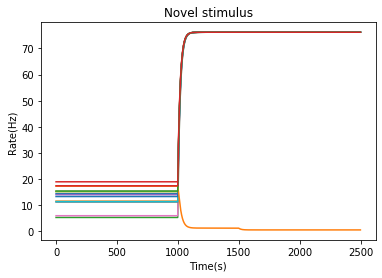

In [8]:
#Novel stimulus
t_max=2500
r=np.zeros((N,t_max))
tau=20
t_pre=1000
t_delay=1500
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt #equation 1
    print("Time:"+str(t))
for t in range(t_delay,t_max):
    for i in range(N):
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt #equation 1
    print("Time:"+str(t))
plt.savefig('Figures/novel_stimulus.png')

In [ ]:
#Familiar Stimulus
I=I0*xi_pattern[0]
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        #xi=0
        #for j in range(N):
        #    if j!=i:
        #        xi=xi+J[i,j]*r[j,t-1]
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt
    print("Time:"+str(t))
for t in range(t_delay,t_max):
    for i in range(N):
        #xi=0
        #for j in range(N):
        #    if j!=i:
        #        xi=xi+J[i,j]*r[j,t-1]
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt
    print("Time:"+str(t))
plt.figure()
for i in range(14):
    plt.plot(range(t_max),r[i])
plt.savefig('Figures/familiar_stimulus.png')

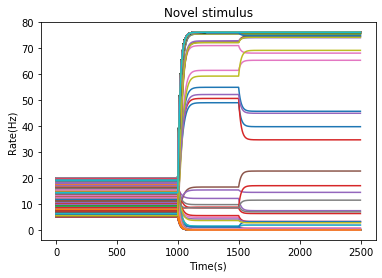

In [36]:
plt.figure()
plt.title('Novel stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Rate(Hz)')
for i in range(5000):
    plt.plot(range(t_max),r[i])
plt.savefig('novel_stimulus2')

In [42]:
i=1
t=1
print(r_pattern[0,0:20])

[13.24865601 14.5464679   5.77783062 13.37443224  9.08442596  5.21501922
 17.48000523  9.0820321  13.72160677 10.85111553  8.27485175 23.91712425
  5.70118368  6.538948   37.23539331  5.99298233  5.70975307  9.60469493
  2.46948902  8.90093227]
